In [28]:
import cv2
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import tensorflow as tf

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, LSTM

In [7]:
image_gen = ImageDataGenerator(#rotation_range=30, # rotate the image 30 degrees
                               #width_shift_range=0.1, # Shift the pic width by a max of 10%
                               #height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               #zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               #fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [8]:
#image_gen.flow_from_directory('positions/train')
image_gen.flow_from_directory('actions/train')

Found 676 images belonging to 3 classes.


In [9]:
image_gen.flow_from_directory('actions/test')

Found 186 images belonging to 3 classes.


In [10]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### Training the Model

In [23]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses

Found 676 images belonging to 3 classes.


In [24]:
#print(next(train_image_gen))
#train_image_gen.shape

In [25]:
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 186 images belonging to 3 classes.


In [26]:
train_image_gen.class_indices

{'fall': 0, 'onFeet': 1, 'sit': 2}

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
t = time.time()
results = model.fit_generator(train_image_gen,epochs=15,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

Epoch 1/15
43/43 [==============================] - 21s 493ms/step - loss: 0.8012 - accuracy: 0.6346 - val_loss: 0.6817 - val_accuracy: 0.6989
Epoch 2/15
43/43 [==============================] - 21s 486ms/step - loss: 0.5255 - accuracy: 0.7885 - val_loss: 0.6102 - val_accuracy: 0.7151
Epoch 3/15
43/43 [==============================] - 22s 512ms/step - loss: 0.3757 - accuracy: 0.8536 - val_loss: 0.5133 - val_accuracy: 0.7903
Epoch 4/15
43/43 [==============================] - 24s 567ms/step - loss: 0.3069 - accuracy: 0.8817 - val_loss: 0.4967 - val_accuracy: 0.7903
Epoch 5/15
43/43 [==============================] - 22s 506ms/step - loss: 0.2527 - accuracy: 0.9053 - val_loss: 0.5348 - val_accuracy: 0.8118
Epoch 6/15
43/43 [==============================] - 22s 512ms/step - loss: 0.1963 - accuracy: 0.9364 - val_loss: 0.4650 - val_accuracy: 0.8333
Epoch 7/15
43/43 [==============================] - 22s 518ms/step - loss: 0.1554 - accuracy: 0.9438 - val_loss: 0.4451 - val_accuracy: 0.8495

In [19]:
y_pred_class = model.predict(test_image_gen)

In [20]:
from sklearn import metrics
#print(metrics.accuracy_score(({'0', '1', '2'}), y_pred_class))
#y_pred_class

In [50]:
model.save('testingModel1.h5')

# Evaluating the Model

In [21]:
results.history

{'loss': [0.8012354969978333,
  0.5254743695259094,
  0.375719279050827,
  0.30688589811325073,
  0.2527056932449341,
  0.19625942409038544,
  0.15540073812007904,
  0.11344190686941147,
  0.11366171389818192,
  0.0934833437204361,
  0.0822218582034111,
  0.04630890488624573,
  0.03834091126918793,
  0.026120727881789207,
  0.03884498402476311],
 'accuracy': [0.6346153616905212,
  0.7884615659713745,
  0.8535503149032593,
  0.88165682554245,
  0.9053254723548889,
  0.9363905191421509,
  0.9437869787216187,
  0.9541420340538025,
  0.9571005702018738,
  0.9704142212867737,
  0.9748520851135254,
  0.9852070808410645,
  0.9866864085197449,
  0.9896449446678162,
  0.9852070808410645],
 'val_loss': [0.6817203164100647,
  0.6102405786514282,
  0.5133111476898193,
  0.4967356324195862,
  0.5348020792007446,
  0.4649690091609955,
  0.4451475739479065,
  0.5436949133872986,
  0.5754215121269226,
  0.4975571036338806,
  0.47805696725845337,
  0.6103736162185669,
  0.6389681100845337,
  0.80192607

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics

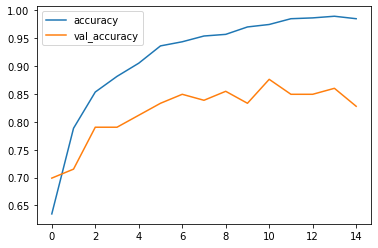

In [32]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.legend()

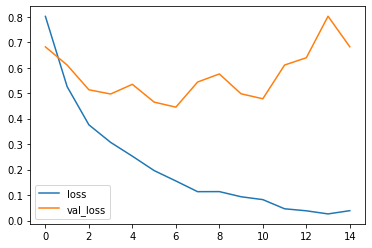

In [28]:
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()

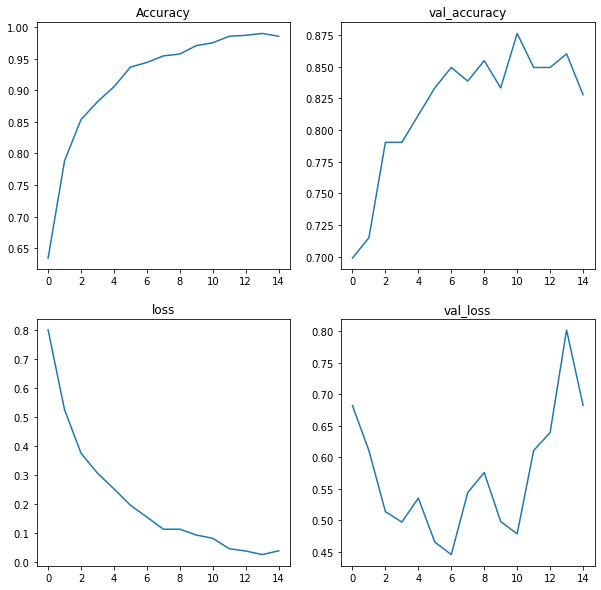

In [40]:
figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

In [53]:
from keras.models import load_model

In [54]:
new_model = load_model('testingModel1.h5')

## Trying with 11 epochs

Epoch 1/11
43/43 [==============================] - 21s 477ms/step - loss: 0.0379 - accuracy: 0.9852 - val_loss: 0.7567 - val_accuracy: 0.8602
Epoch 2/11
43/43 [==============================] - 21s 487ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.8012 - val_accuracy: 0.8710
Epoch 3/11
43/43 [==============================] - 20s 472ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.7541 - val_accuracy: 0.8656
Epoch 4/11
43/43 [==============================] - 21s 478ms/step - loss: 0.0078 - accuracy: 0.9970 - val_loss: 0.9785 - val_accuracy: 0.8763
Epoch 5/11
43/43 [==============================] - 21s 479ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1217 - val_accuracy: 0.8817
Epoch 6/11
43/43 [==============================] - 20s 477ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 1.1298 - val_accuracy: 0.8710
Epoch 7/11
43/43 [==============================] - 20s 474ms/step - loss: 0.0244 - accuracy: 0.9956 - val_loss: 1.1726 - val_accuracy: 0.8710

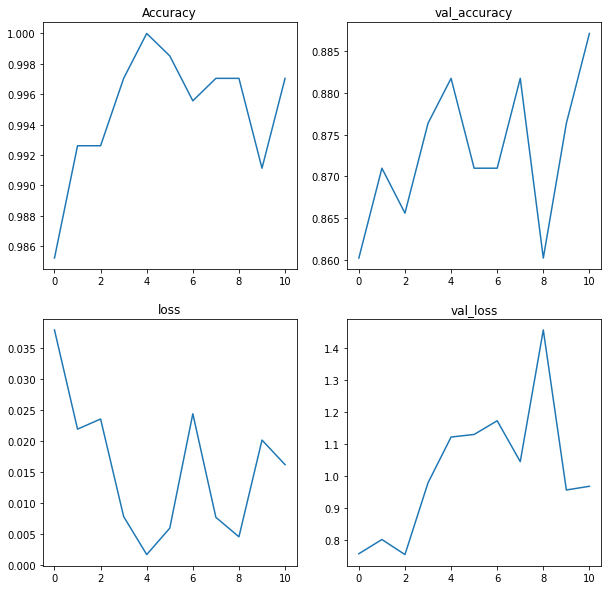

In [41]:
t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

## Trying with smaller batch size (batch_size = 8) and epoch = 11 (BEST MODEL SO FAR)

Found 676 images belonging to 3 classes.
Found 186 images belonging to 3 classes.
Epoch 1/11
85/85 [==============================] - 35s 409ms/step - loss: 8.1536e-04 - accuracy: 1.0000 - val_loss: 1.0452 - val_accuracy: 0.8854
Epoch 2/11
85/85 [==============================] - 28s 326ms/step - loss: 0.0243 - accuracy: 0.9956 - val_loss: 1.6307 - val_accuracy: 0.8854
Epoch 3/11
85/85 [==============================] - 24s 281ms/step - loss: 0.0104 - accuracy: 0.9956 - val_loss: 2.3660 - val_accuracy: 0.8542
Epoch 4/11
85/85 [==============================] - 22s 256ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4882 - val_accuracy: 0.8646
Epoch 5/11
85/85 [==============================] - 23s 272ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 1.8046 - val_accuracy: 0.8021
Epoch 6/11
85/85 [==============================] - 23s 270ms/step - loss: 6.4917e-05 - accuracy: 1.0000 - val_loss: 1.5901 - val_accuracy: 0.8854
Epoch 7/11
85/85 [==============================] - 

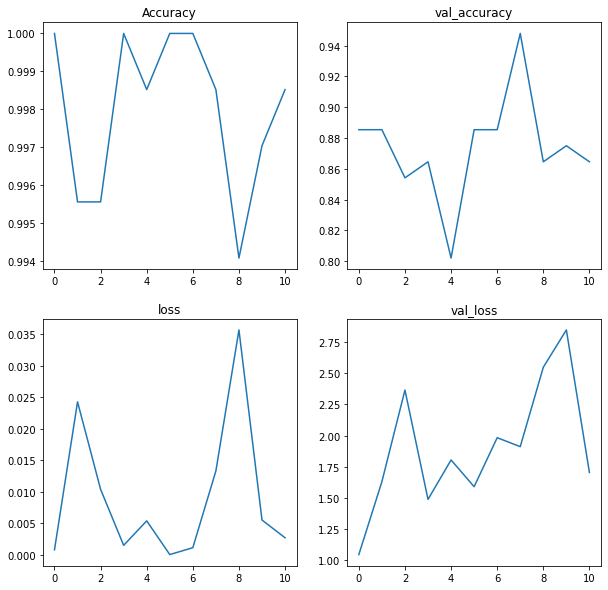

avg accuracy: 0.9979827945882623
avg val accuracy: 0.874053033915433


In [44]:
batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## Same as above, but trying with validation step = None instead of 12

Found 676 images belonging to 3 classes.
Found 186 images belonging to 3 classes.
Epoch 1/11
85/85 [==============================] - 26s 303ms/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 2.5484 - val_accuracy: 0.8763
Epoch 2/11
85/85 [==============================] - 23s 276ms/step - loss: 0.0026 - accuracy: 0.9985 - val_loss: 1.9960 - val_accuracy: 0.8710
Epoch 3/11
85/85 [==============================] - 25s 296ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 1.7218 - val_accuracy: 0.9140
Epoch 4/11
85/85 [==============================] - 24s 288ms/step - loss: 0.0239 - accuracy: 0.9941 - val_loss: 1.9722 - val_accuracy: 0.8710
Epoch 5/11
85/85 [==============================] - 25s 298ms/step - loss: 1.1207e-05 - accuracy: 1.0000 - val_loss: 2.2794 - val_accuracy: 0.8763
Epoch 6/11
85/85 [==============================] - 30s 348ms/step - loss: 0.0195 - accuracy: 0.9926 - val_loss: 1.9769 - val_accuracy: 0.8495
Epoch 7/11
85/85 [==============================] - 28s 

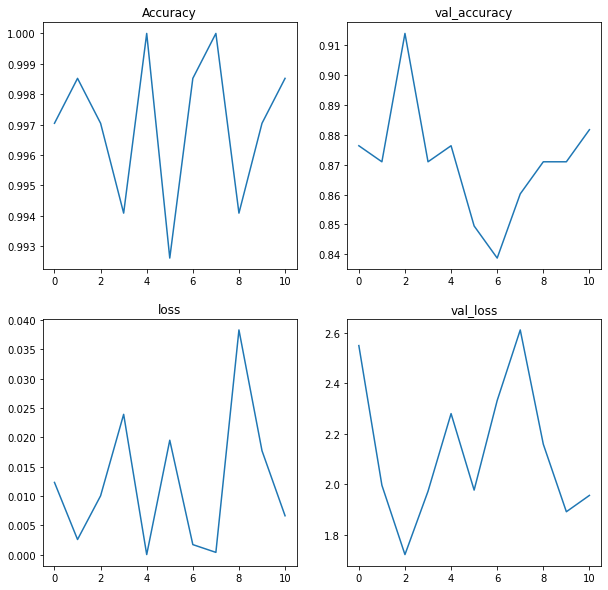

avg accuracy: 0.9970414259217002
avg val accuracy: 0.8709677457809448


In [45]:
batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## Changing the optimizer to adam

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

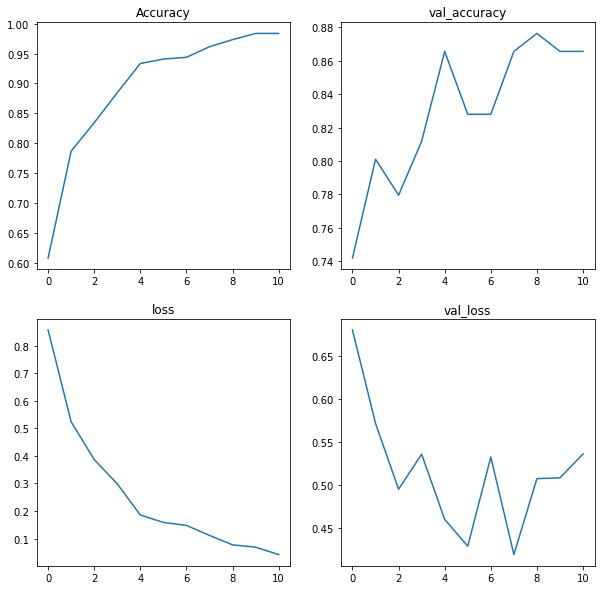

avg accuracy: 0.8940290375189348
avg val accuracy: 0.8299120231108232


In [46]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## Changing the activation function to softmax

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

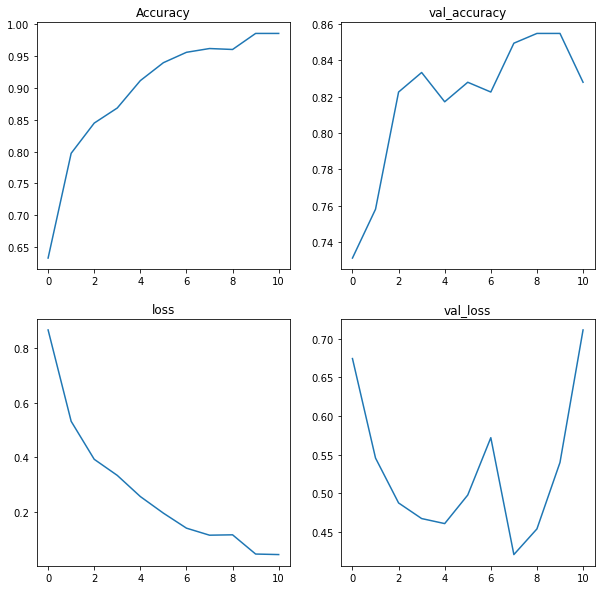

avg accuracy: 0.89470144293525
avg val accuracy: 0.8181818181818182


In [47]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## getting rid of the activation layer and adding the activation to the dense layer

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

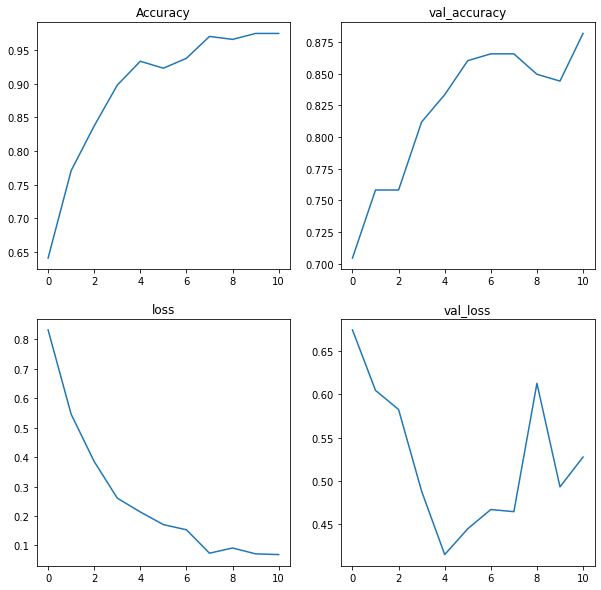

avg accuracy: 0.8933566537770358
avg val accuracy: 0.8211143721233715


In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## activation = softmax & optimizer = rmsprop & batch_size = 8

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/2756560888.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


85/85 [==============================] - 25s 280ms/step - loss: 0.8985 - accuracy: 0.6036 - val_loss: 0.6873 - val_accuracy: 0.7043
Epoch 2/11
85/85 [==============================] - 26s 312ms/step - loss: 0.5378 - accuracy: 0.7796 - val_loss: 0.5040 - val_accuracy: 0.7957
Epoch 3/11
85/85 [==============================] - 25s 300ms/step - loss: 0.4172 - accuracy: 0.8343 - val_loss: 0.4895 - val_accuracy: 0.8011
Epoch 4/11
85/85 [==============================] - 26s 306ms/step - loss: 0.3047 - accuracy: 0.8757 - val_loss: 0.4563 - val_accuracy: 0.8172
Epoch 5/11
85/85 [==============================] - 24s 286ms/step - loss: 0.2291 - accuracy: 0.9053 - val_loss: 0.4601 - val_accuracy: 0.8548
Epoch 6/11
85/85 [==============================] - 24s 287ms/step - loss: 0.2189 - accuracy: 0.9246 - val_loss: 0.4547 - val_accuracy: 0.8065
Epoch 7/11
85/85 [==============================] - 25s 290ms/step - loss: 0.1802 - accuracy: 0.9408 - val_loss: 0.3904 - val_accuracy: 0.8333
Epoch 8/11

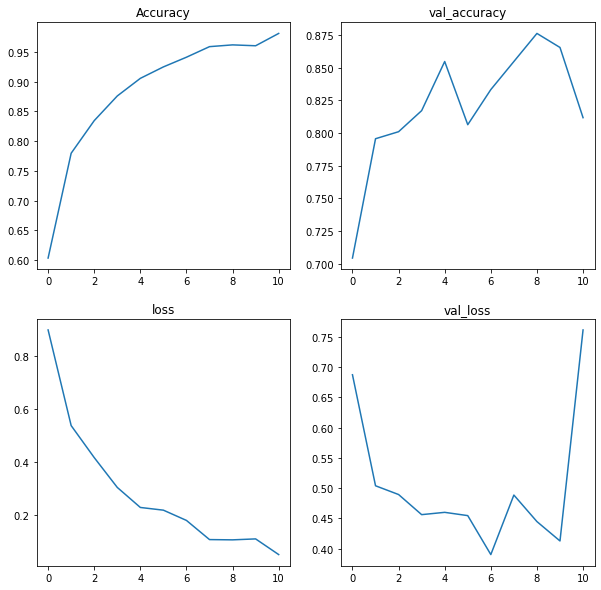

avg accuracy: 0.8840774568644437
avg val accuracy: 0.820136855949055


In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## same as above but with batch size = 16

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/997984683.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 23s 513ms/step - loss: 1.0754 - accuracy: 0.5740 - val_loss: 0.8629 - val_accuracy: 0.6075
Epoch 2/11
43/43 [==============================] - 23s 534ms/step - loss: 0.6058 - accuracy: 0.7411 - val_loss: 0.6731 - val_accuracy: 0.7204
Epoch 3/11
43/43 [==============================] - 23s 523ms/step - loss: 0.4753 - accuracy: 0.8136 - val_loss: 0.5350 - val_accuracy: 0.8118
Epoch 4/11
43/43 [==============================] - 25s 581ms/step - loss: 0.3414 - accuracy: 0.8624 - val_loss: 0.5406 - val_accuracy: 0.7796
Epoch 5/11
43/43 [==============================] - 22s 512ms/step - loss: 0.2898 - accuracy: 0.8950 - val_loss: 0.4574 - val_accuracy: 0.8280
Epoch 6/11
43/43 [==============================] - 23s 527ms/step - loss: 0.2262 - accuracy: 0.9260 - val_loss: 0.4068 - val_accuracy: 0.8495
Epoch 7/11
43/43 [==============================] - 22s 508ms/step - loss: 0.1919 - accuracy: 0.9408 - val_loss: 0.4211 - val_accuracy: 0.8495
Epoch 8/11

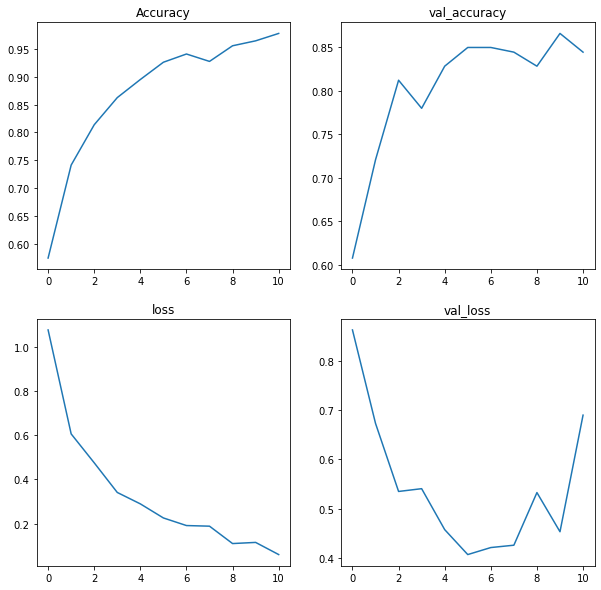

avg accuracy: 0.8707638491283763
avg val accuracy: 0.8025415539741516


In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## remove the size from globalMax2D

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/1898974625.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 25s 572ms/step - loss: 0.9770 - accuracy: 0.6479 - val_loss: 0.6675 - val_accuracy: 0.7527
Epoch 2/11
43/43 [==============================] - 23s 544ms/step - loss: 0.5592 - accuracy: 0.7899 - val_loss: 0.5447 - val_accuracy: 0.7688
Epoch 3/11
43/43 [==============================] - 25s 585ms/step - loss: 0.4142 - accuracy: 0.8491 - val_loss: 0.4510 - val_accuracy: 0.8548
Epoch 4/11
43/43 [==============================] - 24s 564ms/step - loss: 0.2983 - accuracy: 0.8846 - val_loss: 0.5064 - val_accuracy: 0.8226
Epoch 5/11
43/43 [==============================] - 25s 582ms/step - loss: 0.1913 - accuracy: 0.9320 - val_loss: 0.5238 - val_accuracy: 0.8387
Epoch 6/11
43/43 [==============================] - 29s 671ms/step - loss: 0.1796 - accuracy: 0.9364 - val_loss: 0.4633 - val_accuracy: 0.8333
Epoch 7/11
43/43 [==============================] - 23s 527ms/step - loss: 0.1403 - accuracy: 0.9512 - val_loss: 0.4229 - val_accuracy: 0.8441
Epoch 8/11

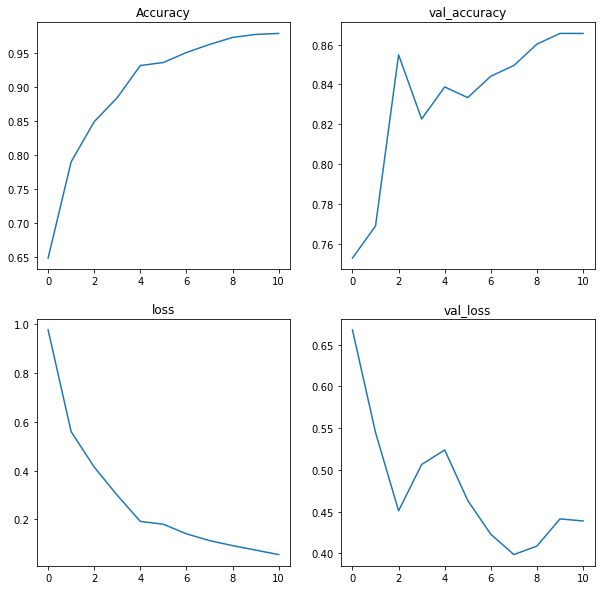

avg accuracy: 0.8986013965173201
avg val accuracy: 0.8323558189652183


In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## same as above plus epoch = 15

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 17, 17, 64)     

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/34849551.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=15,


43/43 [==============================] - 27s 603ms/step - loss: 1.0764 - accuracy: 0.5680 - val_loss: 0.9360 - val_accuracy: 0.6237
Epoch 2/15
43/43 [==============================] - 24s 547ms/step - loss: 0.6163 - accuracy: 0.7574 - val_loss: 0.5788 - val_accuracy: 0.7688
Epoch 3/15
43/43 [==============================] - 35s 808ms/step - loss: 0.4220 - accuracy: 0.8491 - val_loss: 0.5655 - val_accuracy: 0.7366
Epoch 4/15
43/43 [==============================] - 33s 766ms/step - loss: 0.3383 - accuracy: 0.8550 - val_loss: 0.4909 - val_accuracy: 0.7742
Epoch 5/15
43/43 [==============================] - 38s 880ms/step - loss: 0.2393 - accuracy: 0.9053 - val_loss: 0.4656 - val_accuracy: 0.8172
Epoch 6/15
43/43 [==============================] - 30s 696ms/step - loss: 0.2352 - accuracy: 0.9260 - val_loss: 0.4103 - val_accuracy: 0.8226
Epoch 7/15
43/43 [==============================] - 32s 739ms/step - loss: 0.1744 - accuracy: 0.9379 - val_loss: 0.3852 - val_accuracy: 0.8871
Epoch 8/15

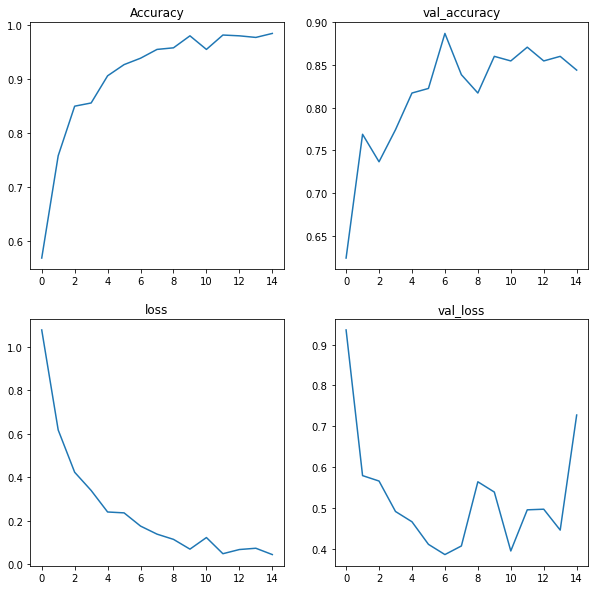

avg accuracy: 0.9042406400044759
avg val accuracy: 0.815412187576294


In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=15,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## add LSTM layer

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(LSTM(units=128, return_sequences=True))
model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 17, 17, 64)

## adding padding=same to cnn model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 18, 18, 64)      

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/1112332395.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 24s 547ms/step - loss: 0.9675 - accuracy: 0.5976 - val_loss: 0.7153 - val_accuracy: 0.6774
Epoch 2/11
43/43 [==============================] - 24s 551ms/step - loss: 0.5505 - accuracy: 0.7766 - val_loss: 0.5263 - val_accuracy: 0.8172
Epoch 3/11
43/43 [==============================] - 23s 523ms/step - loss: 0.3850 - accuracy: 0.8550 - val_loss: 0.4716 - val_accuracy: 0.8226
Epoch 4/11
43/43 [==============================] - 24s 548ms/step - loss: 0.3068 - accuracy: 0.8713 - val_loss: 0.4307 - val_accuracy: 0.8226
Epoch 5/11
43/43 [==============================] - 24s 561ms/step - loss: 0.1936 - accuracy: 0.9290 - val_loss: 0.4449 - val_accuracy: 0.8387
Epoch 6/11
43/43 [==============================] - 24s 552ms/step - loss: 0.1534 - accuracy: 0.9512 - val_loss: 0.3673 - val_accuracy: 0.8763
Epoch 7/11
43/43 [==============================] - 24s 552ms/step - loss: 0.1337 - accuracy: 0.9586 - val_loss: 0.3819 - val_accuracy: 0.8602
Epoch 8/11

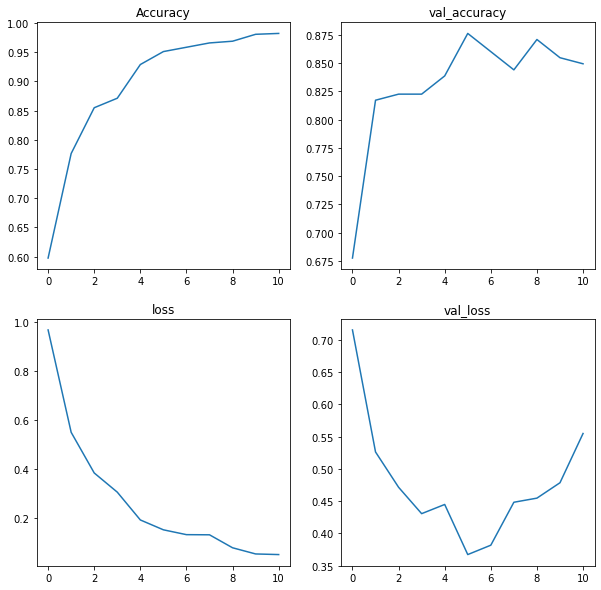

avg accuracy: 0.8942980116063898
avg val accuracy: 0.8304007866165855


In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## removing one of the CNN & one of the pooling layers

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 87616)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/297859631.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 24s 545ms/step - loss: 1.5700 - accuracy: 0.6228 - val_loss: 0.6117 - val_accuracy: 0.7796
Epoch 2/11
43/43 [==============================] - 23s 543ms/step - loss: 0.4297 - accuracy: 0.8254 - val_loss: 0.6118 - val_accuracy: 0.7527
Epoch 3/11
43/43 [==============================] - 24s 561ms/step - loss: 0.2989 - accuracy: 0.8964 - val_loss: 0.4295 - val_accuracy: 0.8333
Epoch 4/11
43/43 [==============================] - 25s 575ms/step - loss: 0.1839 - accuracy: 0.9349 - val_loss: 0.4336 - val_accuracy: 0.8602
Epoch 5/11
43/43 [==============================] - 23s 538ms/step - loss: 0.1420 - accuracy: 0.9541 - val_loss: 0.4331 - val_accuracy: 0.8656
Epoch 6/11
43/43 [==============================] - 23s 536ms/step - loss: 0.0846 - accuracy: 0.9689 - val_loss: 0.4484 - val_accuracy: 0.8763
Epoch 7/11
43/43 [==============================] - 23s 537ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.5329 - val_accuracy: 0.8656
Epoch 8/11

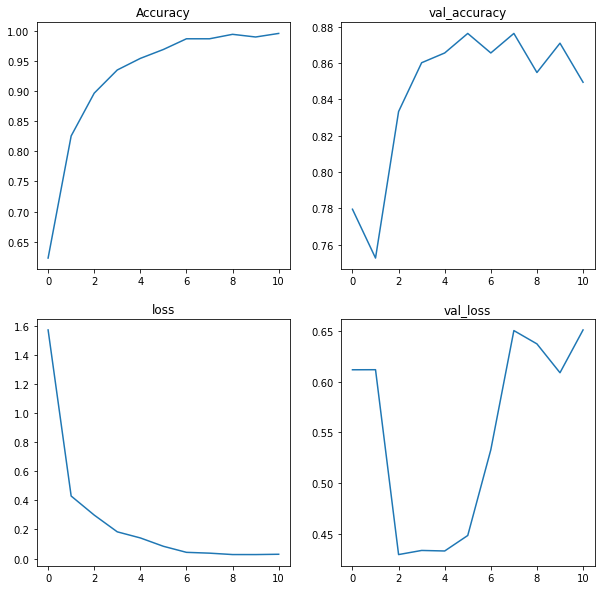

avg accuracy: 0.9232114065777172
avg val accuracy: 0.8440860238942233


In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy']))) 

## putting back the activation function as sigmoid & removing size of pooling layer

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 18, 18, 64)     

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/671417892.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 24s 551ms/step - loss: 1.1513 - accuracy: 0.6183 - val_loss: 0.6577 - val_accuracy: 0.7581
Epoch 2/11
43/43 [==============================] - 24s 554ms/step - loss: 0.5437 - accuracy: 0.7648 - val_loss: 0.5179 - val_accuracy: 0.8226
Epoch 3/11
43/43 [==============================] - 24s 560ms/step - loss: 0.4119 - accuracy: 0.8402 - val_loss: 0.4667 - val_accuracy: 0.8226
Epoch 4/11
43/43 [==============================] - 24s 551ms/step - loss: 0.2676 - accuracy: 0.9127 - val_loss: 0.4571 - val_accuracy: 0.8172
Epoch 5/11
43/43 [==============================] - 26s 603ms/step - loss: 0.2372 - accuracy: 0.9038 - val_loss: 0.5280 - val_accuracy: 0.8226
Epoch 6/11
43/43 [==============================] - 24s 562ms/step - loss: 0.1506 - accuracy: 0.9423 - val_loss: 0.5904 - val_accuracy: 0.8118
Epoch 7/11
43/43 [==============================] - 24s 552ms/step - loss: 0.1563 - accuracy: 0.9408 - val_loss: 0.3891 - val_accuracy: 0.8710
Epoch 8/11

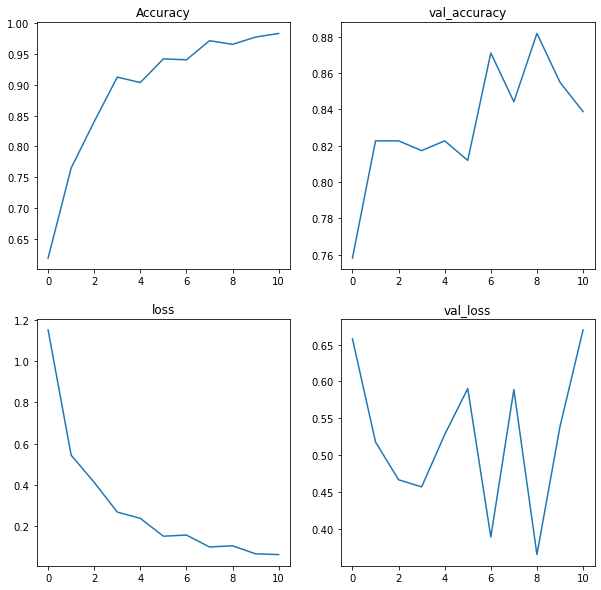

avg accuracy: 0.8929531953551553
avg val accuracy: 0.8313782973722978


In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## same as above but optimizer='adam'

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 18, 18, 64)     

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/4037940706.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


43/43 [==============================] - 25s 550ms/step - loss: 0.9639 - accuracy: 0.6036 - val_loss: 0.7864 - val_accuracy: 0.6720
Epoch 2/11
43/43 [==============================] - 23s 541ms/step - loss: 0.6199 - accuracy: 0.7308 - val_loss: 0.5921 - val_accuracy: 0.7742
Epoch 3/11
43/43 [==============================] - 23s 539ms/step - loss: 0.4252 - accuracy: 0.8447 - val_loss: 0.4882 - val_accuracy: 0.7849
Epoch 4/11
43/43 [==============================] - 23s 545ms/step - loss: 0.3407 - accuracy: 0.8639 - val_loss: 0.5213 - val_accuracy: 0.8172
Epoch 5/11
43/43 [==============================] - 23s 540ms/step - loss: 0.2552 - accuracy: 0.9172 - val_loss: 0.4543 - val_accuracy: 0.8065
Epoch 6/11
43/43 [==============================] - 25s 572ms/step - loss: 0.2093 - accuracy: 0.9231 - val_loss: 0.4200 - val_accuracy: 0.8441
Epoch 7/11
43/43 [==============================] - 24s 576ms/step - loss: 0.1860 - accuracy: 0.9260 - val_loss: 0.3983 - val_accuracy: 0.8387
Epoch 8/11

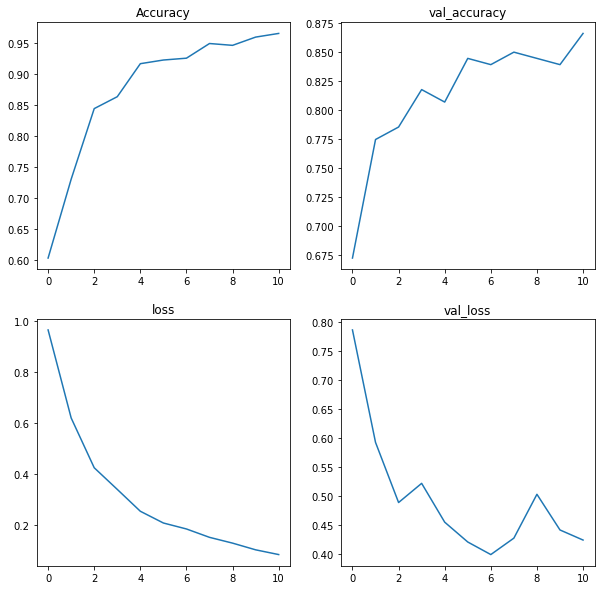

avg accuracy: 0.8756051659584045
avg val accuracy: 0.8123167211359198


In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 16

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## the original

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

t = time.time()
results = model.fit_generator(train_image_gen,epochs=10,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 17, 17, 64)     

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/3287428633.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=10,


Epoch 1/10
43/43 [==============================] - 25s 541ms/step - loss: 0.9733 - accuracy: 0.6006 - val_loss: 0.7096 - val_accuracy: 0.7204
Epoch 2/10
43/43 [==============================] - 32s 739ms/step - loss: 0.5711 - accuracy: 0.7441 - val_loss: 0.6310 - val_accuracy: 0.7204
Epoch 3/10
43/43 [==============================] - 26s 601ms/step - loss: 0.4188 - accuracy: 0.8432 - val_loss: 0.5044 - val_accuracy: 0.8226
Epoch 4/10
43/43 [==============================] - 28s 640ms/step - loss: 0.3407 - accuracy: 0.8624 - val_loss: 0.5021 - val_accuracy: 0.8226
Epoch 5/10
43/43 [==============================] - 25s 584ms/step - loss: 0.2559 - accuracy: 0.9053 - val_loss: 0.6157 - val_accuracy: 0.8065
Epoch 6/10
43/43 [==============================] - 25s 586ms/step - loss: 0.2009 - accuracy: 0.9186 - val_loss: 0.4261 - val_accuracy: 0.8387
Epoch 7/10
43/43 [==============================] - 21s 482ms/step - loss: 0.1732 - accuracy: 0.9364 - val_loss: 0.4687 - val_accuracy: 0.8817

{'loss': [0.9733089208602905, 0.5710651278495789, 0.4187796711921692, 0.3406664729118347, 0.2558615803718567, 0.20086173713207245, 0.17315839231014252, 0.16043329238891602, 0.12330859899520874, 0.10099507868289948], 'accuracy': [0.6005917191505432, 0.7440828680992126, 0.8431952595710754, 0.8624260425567627, 0.9053254723548889, 0.918639063835144, 0.9363905191421509, 0.9437869787216187, 0.965976357460022, 0.9674556255340576], 'val_loss': [0.7096253037452698, 0.6310448050498962, 0.5044195652008057, 0.502094566822052, 0.6156900525093079, 0.4261229336261749, 0.4686807096004486, 0.3802136778831482, 0.4954087734222412, 0.4671268165111542], 'val_accuracy': [0.7204301357269287, 0.7204301357269287, 0.8225806355476379, 0.8225806355476379, 0.8064516186714172, 0.8387096524238586, 0.8817204236984253, 0.8763440847396851, 0.8279569745063782, 0.8602150678634644]}


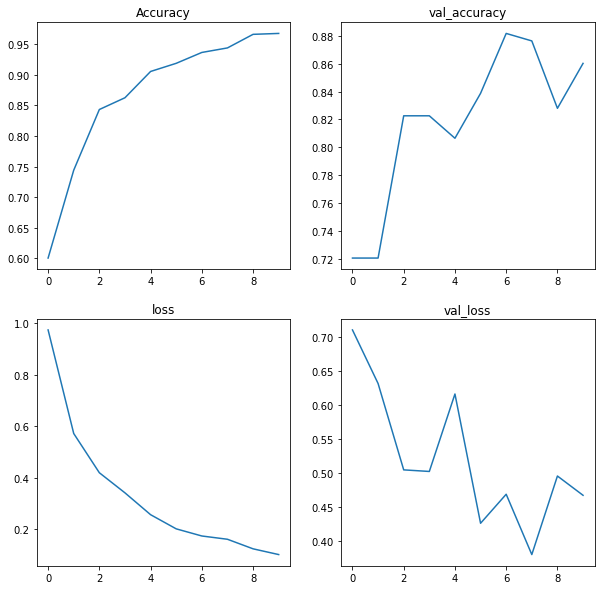

avg accuracy: 0.8687869906425476
avg val accuracy: 0.8177419364452362


In [29]:
print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 87616)             0         
                                                                 
 dense_24 (Dense)            (None, 128)             

C:\Users\Tsega\AppData\Local\Temp/ipykernel_648/2613815671.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=11,


85/85 [==============================] - 42s 474ms/step - loss: 1.1935 - accuracy: 0.6435 - val_loss: 0.6655 - val_accuracy: 0.6989
Epoch 2/11
85/85 [==============================] - 39s 464ms/step - loss: 0.4344 - accuracy: 0.8314 - val_loss: 0.4904 - val_accuracy: 0.7903
Epoch 3/11
85/85 [==============================] - 38s 447ms/step - loss: 0.2920 - accuracy: 0.8964 - val_loss: 0.4420 - val_accuracy: 0.8280
Epoch 4/11
85/85 [==============================] - 36s 427ms/step - loss: 0.1992 - accuracy: 0.9231 - val_loss: 0.4263 - val_accuracy: 0.8226
Epoch 5/11
85/85 [==============================] - 40s 474ms/step - loss: 0.1419 - accuracy: 0.9497 - val_loss: 0.3931 - val_accuracy: 0.8871
Epoch 6/11
85/85 [==============================] - 40s 467ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 0.5528 - val_accuracy: 0.8495
Epoch 7/11
85/85 [==============================] - 39s 462ms/step - loss: 0.0664 - accuracy: 0.9882 - val_loss: 0.6760 - val_accuracy: 0.8656
Epoch 8/11

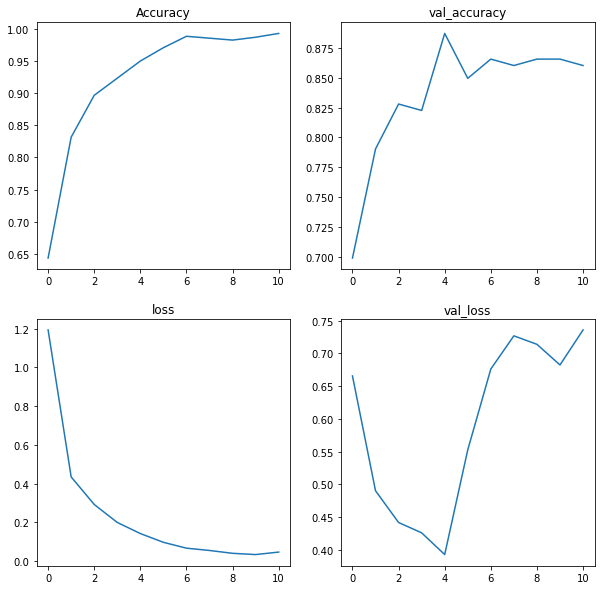

avg accuracy: 0.9226734854958274
avg val accuracy: 0.8357771309939298


In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

#-------------------------------------------------------------------------

batch_size = 8

train_image_gen = image_gen.flow_from_directory('actions/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actions/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit_generator(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy']))) 

## Running the best model with Balanced Data

In [11]:
image_gen.flow_from_directory('actionsBalanced/train')
image_gen.flow_from_directory('actionsBalanced/test')

Found 447 images belonging to 3 classes.
Found 116 images belonging to 3 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

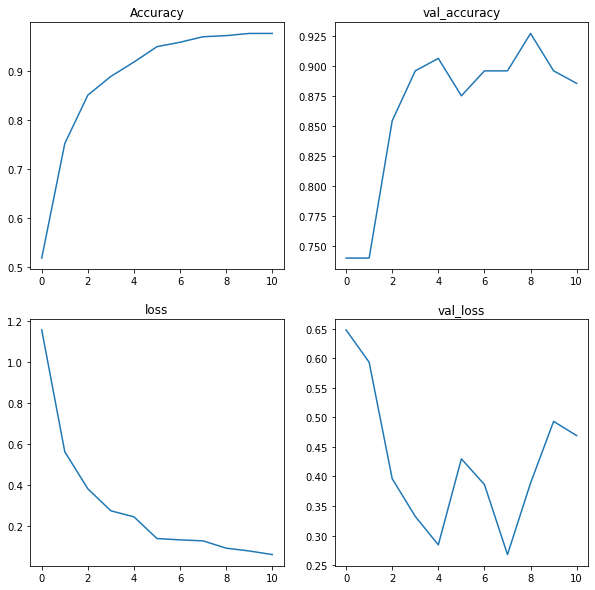

avg accuracy: 0.8838722814213146
avg val accuracy: 0.8645833243023265


In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

# ---------------------------------------------------------------------


batch_size = 8

train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=11,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")
  
# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")
  
# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## Experimenting with different batch sizes

BATCH SIZE: 2
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
224/224 [==============================] - 23s 100ms/step - loss: 0.9715 - accuracy: 0.5357 - val_loss: 0.5566 - val_accuracy: 0.8333
Epoch 2/11
224/224 [==============================] - 22s 99ms/step - loss: 0.5584 - accuracy: 0.7589 - val_loss: 0.4410 - val_accuracy: 0.9167
Epoch 3/11
224/224 [==============================] - 21s 94ms/step - loss: 0.4344 - accuracy: 0.8281 - val_loss: 0.5593 - val_accuracy: 0.8333
Epoch 4/11
224/224 [==============================] - 22s 97ms/step - loss: 0.3747 - accuracy: 0.8594 - val_loss: 0.3447 - val_accuracy: 0.9583
Epoch 5/11
224/224 [==============================] - 21s 93ms/step - loss: 0.2584 - accuracy: 0.9152 - val_loss: 0.2335 - val_accuracy: 0.8333
Epoch 6/11
224/224 [==============================] - 22s 99ms/step - loss: 0.2458 - accuracy: 0.9219 - val_loss: 0.4074 - val_accuracy: 0.7917
Epoch 7/11
224/224 [===================

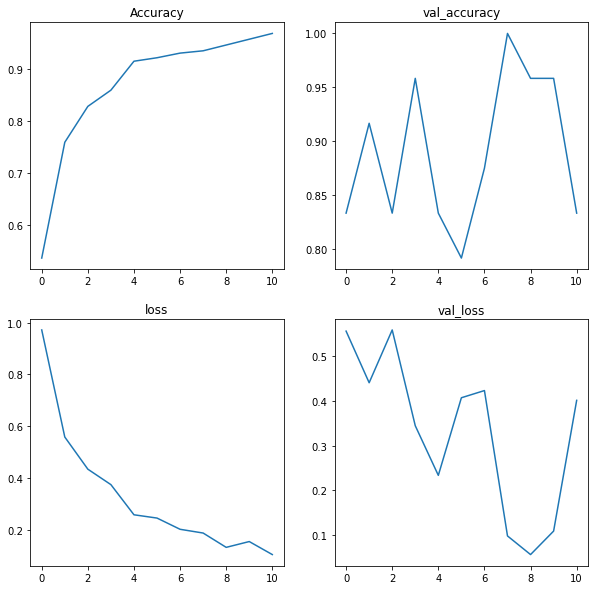

avg accuracy: 0.8689123446291144
avg val accuracy: 0.8901515061205084

**********************************************************************
BATCH SIZE 2 HAS AVG VAL ACCURACY OF 0.8901515061205084
**********************************************************************

BATCH SIZE: 4
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
112/112 [==============================] - 19s 157ms/step - loss: 1.0384 - accuracy: 0.5402 - val_loss: 0.6578 - val_accuracy: 0.7292
Epoch 2/11
112/112 [==============================] - 18s 159ms/step - loss: 0.5448 - accuracy: 0.7835 - val_loss: 0.4598 - val_accuracy: 0.7708
Epoch 3/11
112/112 [==============================] - 18s 163ms/step - loss: 0.3497 - accuracy: 0.8683 - val_loss: 0.6480 - val_accuracy: 0.7708
Epoch 4/11
112/112 [==============================] - 18s 158ms/step - loss: 0.3066 - accuracy: 0.9040 - val_loss: 0.5309 - val_accuracy: 0.8125
Epoch 5/11
112/112 [==============================] - 

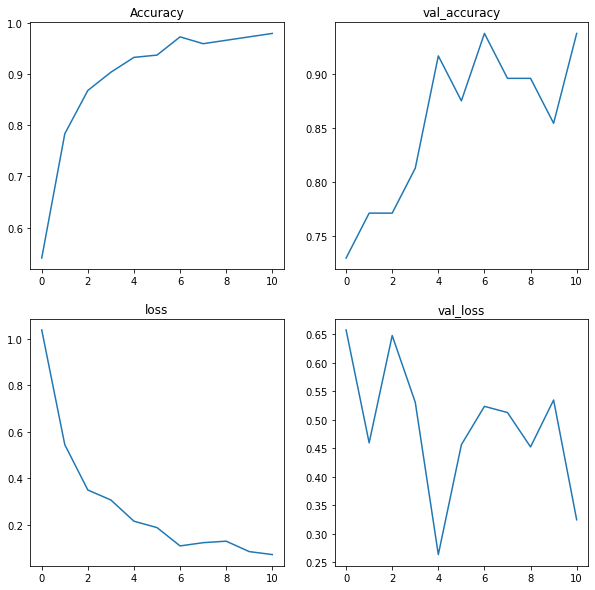

avg accuracy: 0.8926542238755659
avg val accuracy: 0.8541666648604653

**********************************************************************
BATCH SIZE 4 HAS AVG VAL ACCURACY OF 0.8541666648604653
**********************************************************************

BATCH SIZE: 8
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
56/56 [==============================] - 18s 298ms/step - loss: 1.0372 - accuracy: 0.5089 - val_loss: 0.6455 - val_accuracy: 0.8229
Epoch 2/11
56/56 [==============================] - 18s 319ms/step - loss: 0.5429 - accuracy: 0.7768 - val_loss: 0.4804 - val_accuracy: 0.8438
Epoch 3/11
56/56 [==============================] - 19s 333ms/step - loss: 0.3897 - accuracy: 0.8594 - val_loss: 0.3853 - val_accuracy: 0.8958
Epoch 4/11
56/56 [==============================] - 17s 300ms/step - loss: 0.2734 - accuracy: 0.9129 - val_loss: 0.3560 - val_accuracy: 0.8958
Epoch 5/11
56/56 [==============================] - 17s 303ms/

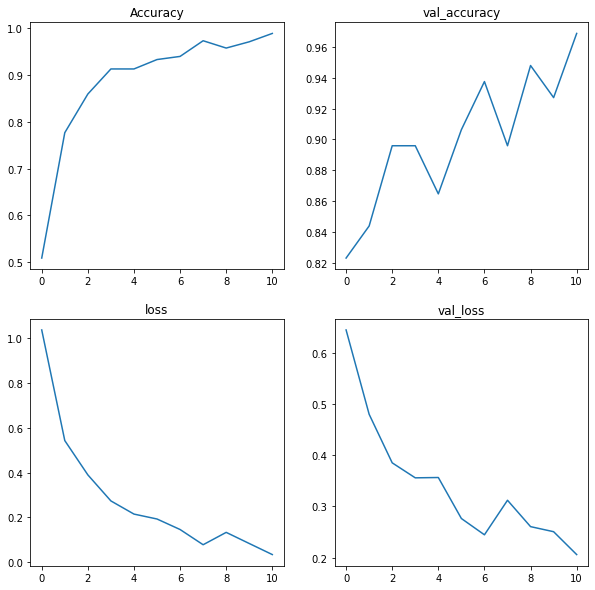

avg accuracy: 0.8849431763995778
avg val accuracy: 0.9005681763995778

**********************************************************************
BATCH SIZE 8 HAS AVG VAL ACCURACY OF 0.9005681763995778
**********************************************************************

BATCH SIZE: 16
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
28/28 [==============================] - 16s 524ms/step - loss: 1.0211 - accuracy: 0.5246 - val_loss: 0.6943 - val_accuracy: 0.6897
Epoch 2/11
28/28 [==============================] - 13s 472ms/step - loss: 0.5946 - accuracy: 0.7634
Epoch 3/11
28/28 [==============================] - 14s 498ms/step - loss: 0.3543 - accuracy: 0.8728
Epoch 4/11
28/28 [==============================] - 14s 486ms/step - loss: 0.3314 - accuracy: 0.8772
Epoch 5/11
28/28 [==============================] - 14s 492ms/step - loss: 0.2231 - accuracy: 0.9241
Epoch 6/11
28/28 [==============================] - 15s 532ms/step - loss: 0.1836 - ac

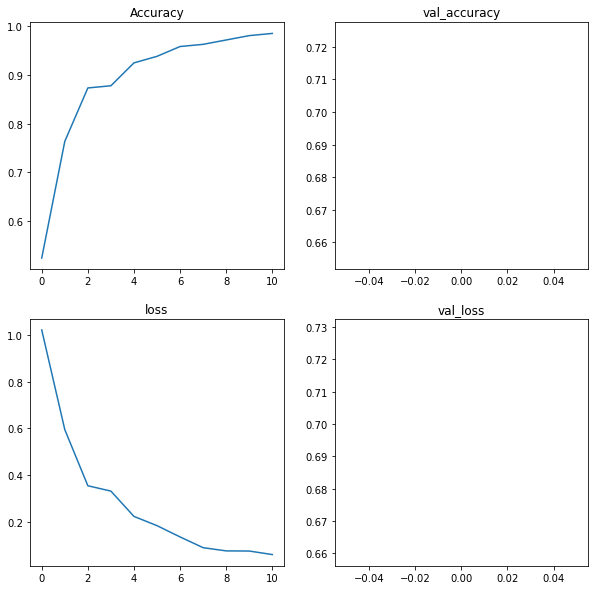

avg accuracy: 0.886769484389912
avg val accuracy: 0.6896551847457886

**********************************************************************
BATCH SIZE 16 HAS AVG VAL ACCURACY OF 0.6896551847457886
**********************************************************************

BATCH SIZE: 32
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
14/14 [==============================] - 16s 1s/step - loss: 1.3132 - accuracy: 0.4777 - val_loss: 0.9601 - val_accuracy: 0.5345
Epoch 2/11
14/14 [==============================] - 14s 983ms/step - loss: 0.7302 - accuracy: 0.6920
Epoch 3/11
14/14 [==============================] - 14s 973ms/step - loss: 0.4210 - accuracy: 0.8237
Epoch 4/11
14/14 [==============================] - 13s 922ms/step - loss: 0.3600 - accuracy: 0.8683
Epoch 5/11
14/14 [==============================] - 13s 915ms/step - loss: 0.2551 - accuracy: 0.9263
Epoch 6/11
14/14 [==============================] - 13s 941ms/step - loss: 0.1758 - accur

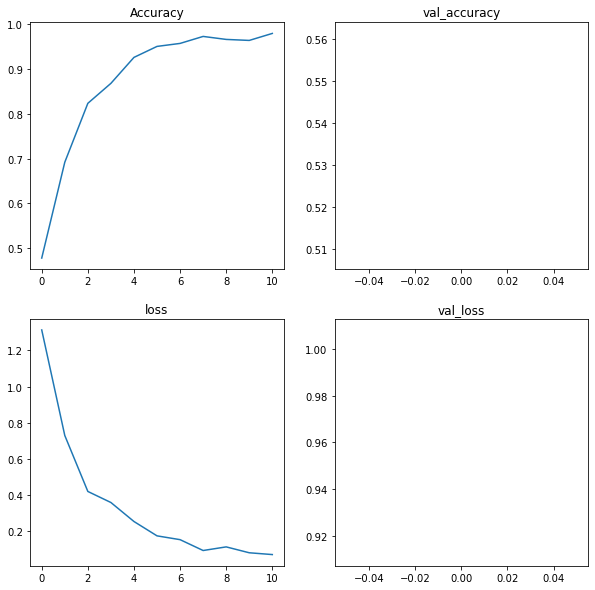

avg accuracy: 0.8709415603767742
avg val accuracy: 0.5344827771186829

**********************************************************************
BATCH SIZE 32 HAS AVG VAL ACCURACY OF 0.5344827771186829
**********************************************************************

BATCH SIZE: 64
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
7/7 [==============================] - 18s 2s/step - loss: 1.3567 - accuracy: 0.3571 - val_loss: 1.0074 - val_accuracy: 0.5517
Epoch 2/11
7/7 [==============================] - 13s 2s/step - loss: 0.9821 - accuracy: 0.5536
Epoch 3/11
7/7 [==============================] - 13s 2s/step - loss: 0.8748 - accuracy: 0.6094
Epoch 4/11
7/7 [==============================] - 13s 2s/step - loss: 0.5217 - accuracy: 0.8036
Epoch 5/11
7/7 [==============================] - 15s 2s/step - loss: 0.3630 - accuracy: 0.8594
Epoch 6/11
7/7 [==============================] - 13s 2s/step - loss: 0.4921 - accuracy: 0.8326
Epoch 7/11
7/7

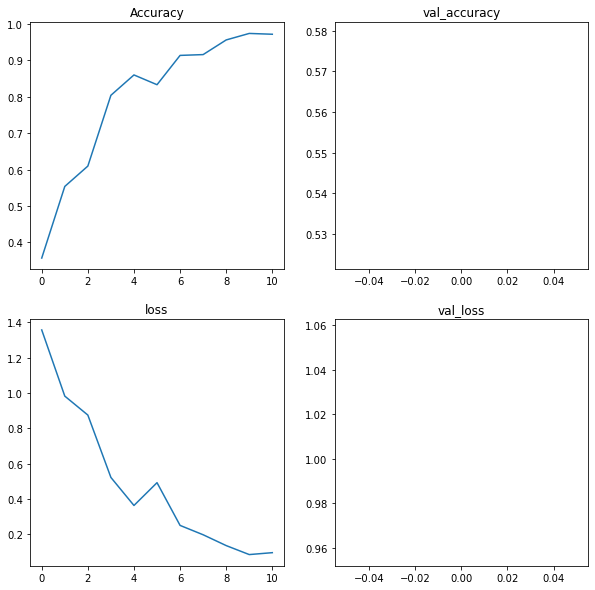

avg accuracy: 0.79484577070583
avg val accuracy: 0.5517241358757019

**********************************************************************
BATCH SIZE 64 HAS AVG VAL ACCURACY OF 0.5517241358757019
**********************************************************************



In [25]:
#print(model.summary())

# -----------------------------------------------------------------------

batch_sizes = [2, 4, 8, 16, 32, 64]

for batch_size in batch_sizes:
    print('BATCH SIZE:', batch_size)
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
    model.add(Dropout(0.5))

    # Last layer, not binary!
    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss='categorical_crossentropy', #not binary for the poses
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                                   target_size=image_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical') #catagoricalnfor the poses
    test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                                   target_size=image_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

    t = time.time()
    results = model.fit(train_image_gen,epochs=11,
                                  #steps_per_epoch=50,
                                  validation_data=test_image_gen,
                                 validation_steps=12)
    print('Duration:', time.time() - t)

    print(results.history)

    figure, axis = plt.subplots(2, 2, figsize=(10,10))

    # For Sine Function
    axis[0, 0].plot(results.history['accuracy'])
    axis[0, 0].set_title("Accuracy")

    # For Cosine Function
    axis[0, 1].plot(results.history['val_accuracy'])
    axis[0, 1].set_title("val_accuracy")

    # For Tangent Function
    axis[1, 0].plot(results.history['loss'])
    axis[1, 0].set_title("loss")

    # For Tanh Function
    axis[1, 1].plot(results.history['val_loss'])
    axis[1, 1].set_title("val_loss")

    # Combine all the operations and display
    plt.show()

    print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
    print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))
    print('\n**********************************************************************')
    print('BATCH SIZE', batch_size, 'HAS AVG VAL ACCURACY OF', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))
    print('**********************************************************************\n')
    

## Experimenting with different epoch numbers

EPOCH: 3
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/3
56/56 [==============================] - 17s 283ms/step - loss: 0.9616 - accuracy: 0.5759 - val_loss: 0.4793 - val_accuracy: 0.8229
Epoch 2/3
56/56 [==============================] - 15s 272ms/step - loss: 0.5581 - accuracy: 0.7790 - val_loss: 0.4897 - val_accuracy: 0.7917
Epoch 3/3
56/56 [==============================] - 15s 275ms/step - loss: 0.3872 - accuracy: 0.8549 - val_loss: 0.3445 - val_accuracy: 0.8750
Duration: 47.963717222213745
{'loss': [0.9616442322731018, 0.5580922961235046, 0.3871763050556183], 'accuracy': [0.5758928656578064, 0.7790178656578064, 0.8549107313156128], 'val_loss': [0.4793182611465454, 0.48972371220588684, 0.3444783389568329], 'val_accuracy': [0.8229166865348816, 0.7916666865348816, 0.875]}


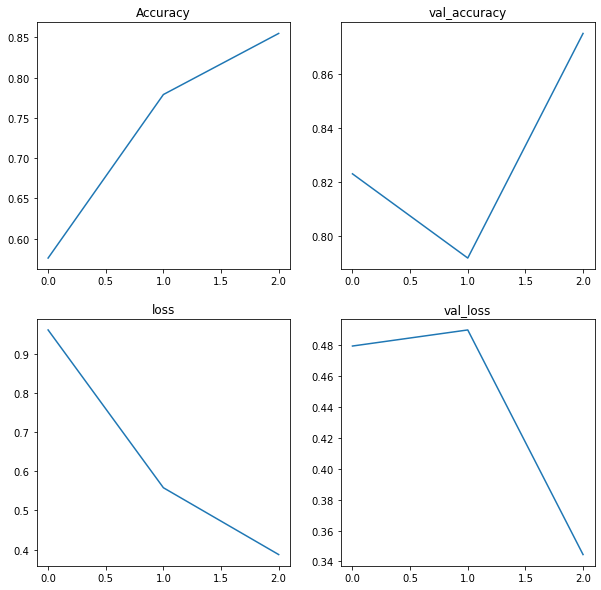

avg accuracy: 0.7366071542104086
avg val accuracy: 0.8298611243565878

**********************************************************************
EPOCH SIZE 3 HAS AVG VAL ACCURACY OF 0.8298611243565878
**********************************************************************

EPOCH: 4
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/4
56/56 [==============================] - 18s 291ms/step - loss: 1.0086 - accuracy: 0.5469 - val_loss: 0.6590 - val_accuracy: 0.7292
Epoch 2/4
56/56 [==============================] - 16s 292ms/step - loss: 0.5643 - accuracy: 0.7656 - val_loss: 0.4225 - val_accuracy: 0.8542
Epoch 3/4
56/56 [==============================] - 16s 288ms/step - loss: 0.3828 - accuracy: 0.8549 - val_loss: 0.5283 - val_accuracy: 0.8333
Epoch 4/4
56/56 [==============================] - 16s 278ms/step - loss: 0.2631 - accuracy: 0.9107 - val_loss: 0.3410 - val_accuracy: 0.8854
Duration: 66.49530696868896
{'loss': [1.008617877960205, 0.564303755760

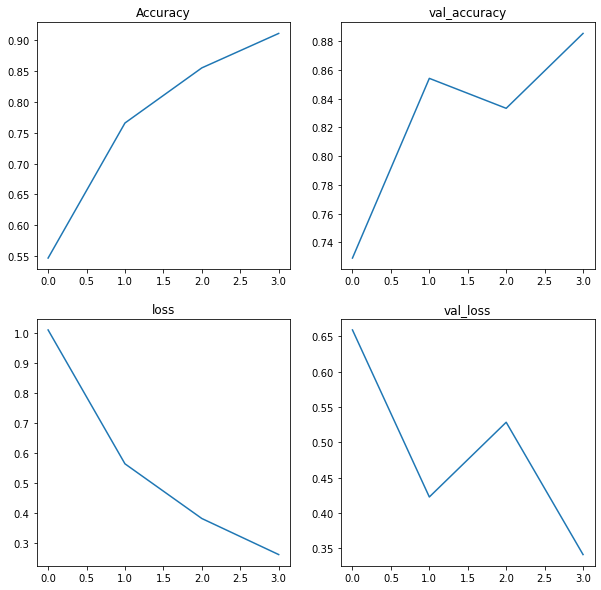

avg accuracy: 0.76953125
avg val accuracy: 0.8255208432674408

**********************************************************************
EPOCH SIZE 4 HAS AVG VAL ACCURACY OF 0.8255208432674408
**********************************************************************

EPOCH: 5
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/5
56/56 [==============================] - 17s 280ms/step - loss: 0.9688 - accuracy: 0.5089 - val_loss: 0.6628 - val_accuracy: 0.7083
Epoch 2/5
56/56 [==============================] - 16s 285ms/step - loss: 0.5340 - accuracy: 0.7835 - val_loss: 0.4168 - val_accuracy: 0.8958
Epoch 3/5
56/56 [==============================] - 16s 286ms/step - loss: 0.3961 - accuracy: 0.8549 - val_loss: 0.3944 - val_accuracy: 0.8542
Epoch 4/5
56/56 [==============================] - 16s 282ms/step - loss: 0.2713 - accuracy: 0.9018 - val_loss: 0.3839 - val_accuracy: 0.8646
Epoch 5/5
56/56 [==============================] - 16s 285ms/step - loss: 0.180

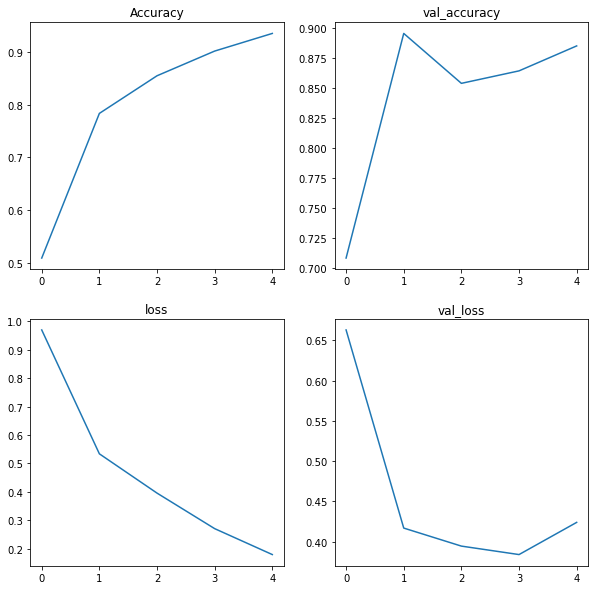

avg accuracy: 0.7968750119209289
avg val accuracy: 0.8416666626930237

**********************************************************************
EPOCH SIZE 5 HAS AVG VAL ACCURACY OF 0.8416666626930237
**********************************************************************

EPOCH: 6
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/6
56/56 [==============================] - 17s 285ms/step - loss: 0.9529 - accuracy: 0.5446 - val_loss: 0.5611 - val_accuracy: 0.7708
Epoch 2/6
56/56 [==============================] - 16s 282ms/step - loss: 0.5028 - accuracy: 0.8036 - val_loss: 0.3788 - val_accuracy: 0.8438
Epoch 3/6
56/56 [==============================] - 17s 308ms/step - loss: 0.3397 - accuracy: 0.8795 - val_loss: 0.3191 - val_accuracy: 0.8958
Epoch 4/6
56/56 [==============================] - 16s 293ms/step - loss: 0.2414 - accuracy: 0.9196 - val_loss: 0.3153 - val_accuracy: 0.9062
Epoch 5/6
56/56 [==============================] - 16s 282ms/step - los

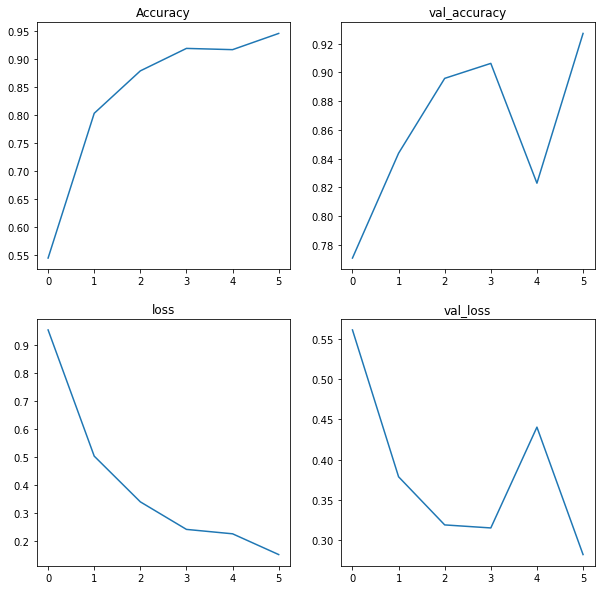

avg accuracy: 0.8351934552192688
avg val accuracy: 0.8611111044883728

**********************************************************************
EPOCH SIZE 6 HAS AVG VAL ACCURACY OF 0.8611111044883728
**********************************************************************

EPOCH: 8
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/8
56/56 [==============================] - 17s 286ms/step - loss: 0.9789 - accuracy: 0.5714 - val_loss: 0.5871 - val_accuracy: 0.8229
Epoch 2/8
56/56 [==============================] - 16s 282ms/step - loss: 0.5643 - accuracy: 0.7835 - val_loss: 0.4710 - val_accuracy: 0.8021
Epoch 3/8
56/56 [==============================] - 16s 288ms/step - loss: 0.3681 - accuracy: 0.8571 - val_loss: 0.3281 - val_accuracy: 0.8854
Epoch 4/8
56/56 [==============================] - 16s 291ms/step - loss: 0.2811 - accuracy: 0.9018 - val_loss: 0.3073 - val_accuracy: 0.9062
Epoch 5/8
56/56 [==============================] - 16s 280ms/step - los

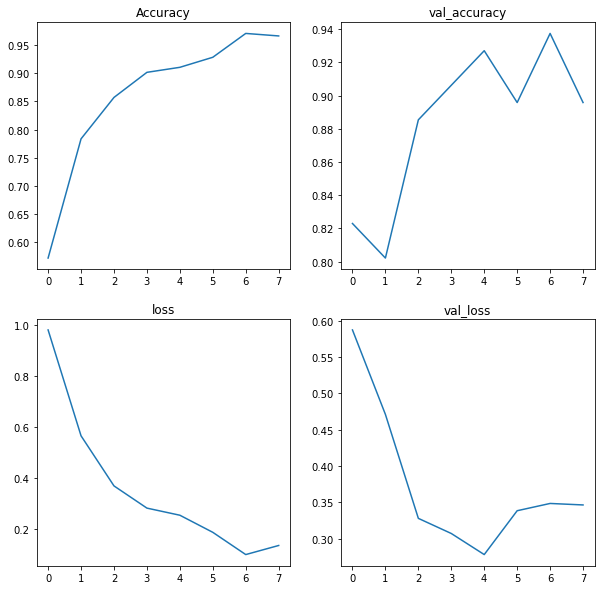

avg accuracy: 0.861328125
avg val accuracy: 0.8841145783662796

**********************************************************************
EPOCH SIZE 8 HAS AVG VAL ACCURACY OF 0.8841145783662796
**********************************************************************

EPOCH: 10
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/10
56/56 [==============================] - 17s 282ms/step - loss: 0.9372 - accuracy: 0.5759 - val_loss: 0.6035 - val_accuracy: 0.7604
Epoch 2/10
56/56 [==============================] - 16s 285ms/step - loss: 0.5225 - accuracy: 0.8080 - val_loss: 0.4547 - val_accuracy: 0.8333
Epoch 3/10
56/56 [==============================] - 16s 280ms/step - loss: 0.4046 - accuracy: 0.8326 - val_loss: 0.3689 - val_accuracy: 0.9062
Epoch 4/10
56/56 [==============================] - 16s 283ms/step - loss: 0.2603 - accuracy: 0.8973 - val_loss: 0.4816 - val_accuracy: 0.8750
Epoch 5/10
56/56 [==============================] - 17s 295ms/step - loss

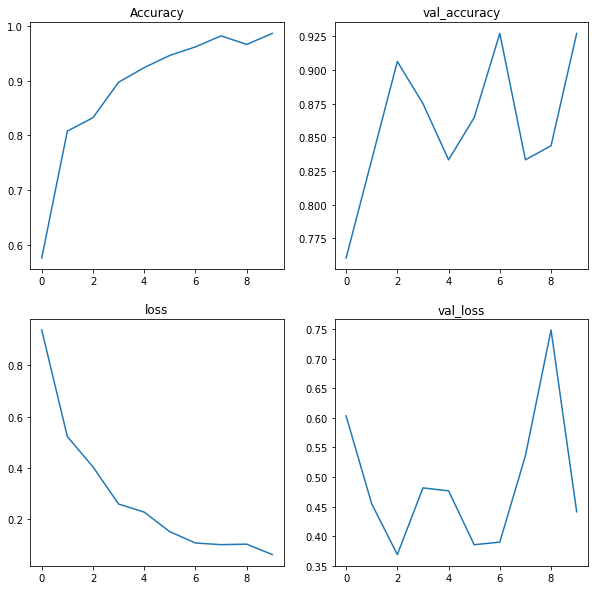

avg accuracy: 0.8881696462631226
avg val accuracy: 0.8604166567325592

**********************************************************************
EPOCH SIZE 10 HAS AVG VAL ACCURACY OF 0.8604166567325592
**********************************************************************

EPOCH: 11
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/11
56/56 [==============================] - 18s 302ms/step - loss: 1.0904 - accuracy: 0.5112 - val_loss: 0.7216 - val_accuracy: 0.7917
Epoch 2/11
56/56 [==============================] - 17s 298ms/step - loss: 0.5784 - accuracy: 0.7924 - val_loss: 0.4434 - val_accuracy: 0.8125
Epoch 3/11
56/56 [==============================] - 28s 507ms/step - loss: 0.3615 - accuracy: 0.8683 - val_loss: 0.4463 - val_accuracy: 0.8646
Epoch 4/11
56/56 [==============================] - 27s 485ms/step - loss: 0.3042 - accuracy: 0.8973 - val_loss: 0.4233 - val_accuracy: 0.8438
Epoch 5/11
56/56 [==============================] - 27s 488ms/ste

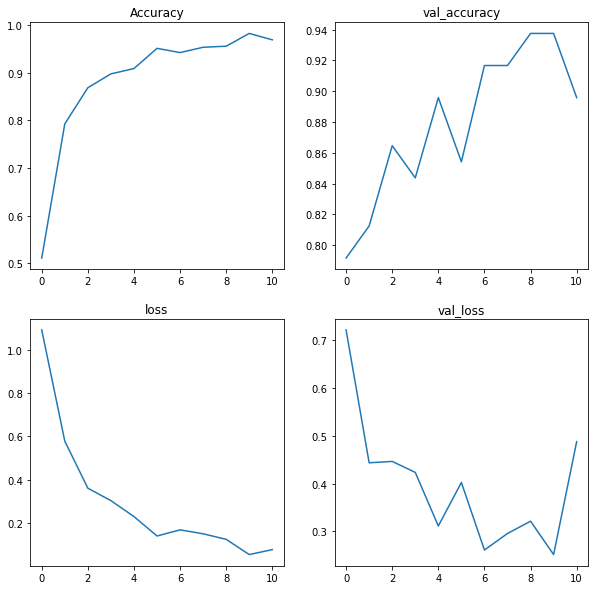

avg accuracy: 0.8845373392105103
avg val accuracy: 0.8787878805940802

**********************************************************************
EPOCH SIZE 11 HAS AVG VAL ACCURACY OF 0.8787878805940802
**********************************************************************

EPOCH: 13
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/13
56/56 [==============================] - 31s 459ms/step - loss: 0.9986 - accuracy: 0.5402 - val_loss: 0.5959 - val_accuracy: 0.7604
Epoch 2/13
56/56 [==============================] - 28s 499ms/step - loss: 0.5755 - accuracy: 0.7612 - val_loss: 0.5166 - val_accuracy: 0.7917
Epoch 3/13
56/56 [==============================] - 25s 443ms/step - loss: 0.3707 - accuracy: 0.8594 - val_loss: 0.4381 - val_accuracy: 0.8646
Epoch 4/13
56/56 [==============================] - 29s 523ms/step - loss: 0.2443 - accuracy: 0.9152 - val_loss: 0.3960 - val_accuracy: 0.8750
Epoch 5/13
56/56 [==============================] - 22s 388ms/ste

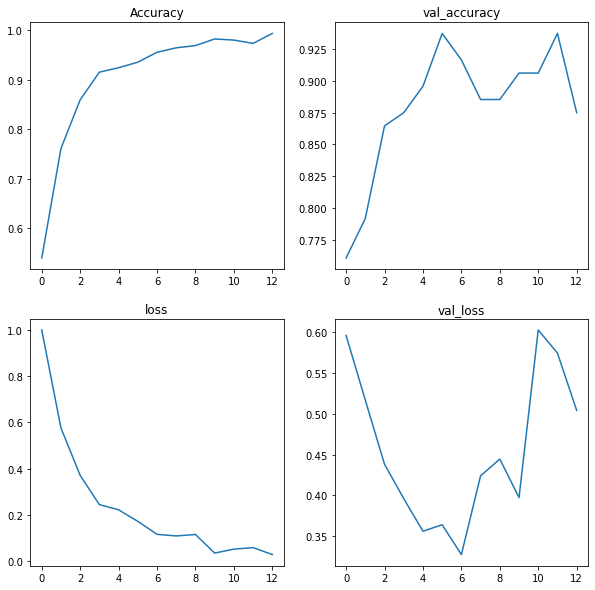

avg accuracy: 0.9040178656578064
avg val accuracy: 0.879807696892665

**********************************************************************
EPOCH SIZE 13 HAS AVG VAL ACCURACY OF 0.879807696892665
**********************************************************************

EPOCH: 15
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/15
56/56 [==============================] - 40s 595ms/step - loss: 0.9719 - accuracy: 0.5469 - val_loss: 0.5648 - val_accuracy: 0.8333
Epoch 2/15
56/56 [==============================] - 33s 584ms/step - loss: 0.5237 - accuracy: 0.7991 - val_loss: 0.4592 - val_accuracy: 0.8125
Epoch 3/15
56/56 [==============================] - 31s 550ms/step - loss: 0.3699 - accuracy: 0.8683 - val_loss: 0.3734 - val_accuracy: 0.8438
Epoch 4/15
56/56 [==============================] - 30s 541ms/step - loss: 0.2475 - accuracy: 0.8906 - val_loss: 0.3176 - val_accuracy: 0.8854
Epoch 5/15
56/56 [==============================] - 26s 468ms/step 

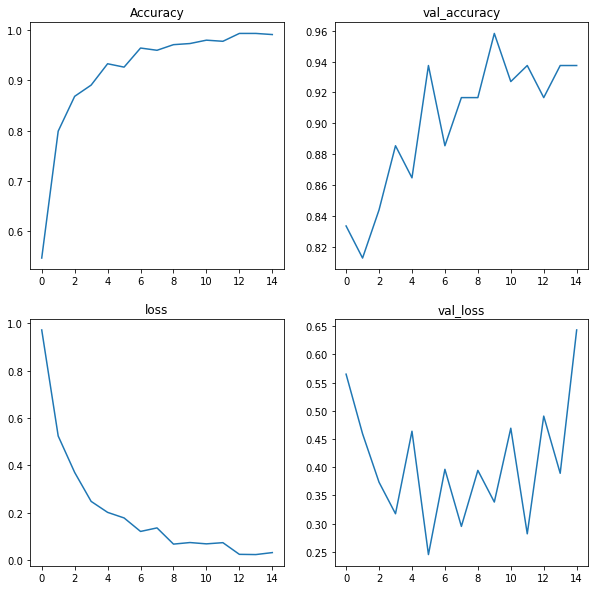

avg accuracy: 0.9178571462631225
avg val accuracy: 0.9006944457689922

**********************************************************************
EPOCH SIZE 15 HAS AVG VAL ACCURACY OF 0.9006944457689922
**********************************************************************

EPOCH: 17
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/17
56/56 [==============================] - 31s 461ms/step - loss: 0.9675 - accuracy: 0.5938 - val_loss: 0.6639 - val_accuracy: 0.7396
Epoch 2/17
56/56 [==============================] - 27s 485ms/step - loss: 0.5352 - accuracy: 0.7857 - val_loss: 0.4325 - val_accuracy: 0.8229
Epoch 3/17
56/56 [==============================] - 23s 406ms/step - loss: 0.3613 - accuracy: 0.8638 - val_loss: 0.3015 - val_accuracy: 0.8854
Epoch 4/17
56/56 [==============================] - 17s 306ms/step - loss: 0.2515 - accuracy: 0.8951 - val_loss: 0.4917 - val_accuracy: 0.8333
Epoch 5/17
56/56 [==============================] - 17s 298ms/ste

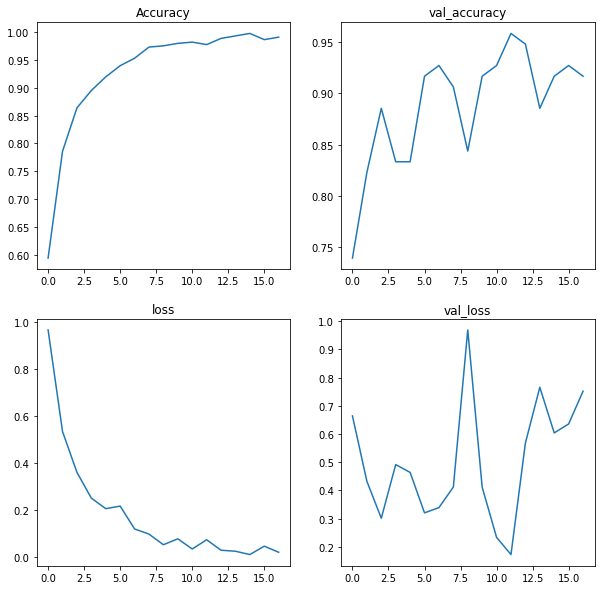

avg accuracy: 0.929227937670315
avg val accuracy: 0.8884803933255813

**********************************************************************
EPOCH SIZE 17 HAS AVG VAL ACCURACY OF 0.8884803933255813
**********************************************************************

EPOCH: 19
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/19
56/56 [==============================] - 18s 286ms/step - loss: 1.0305 - accuracy: 0.5536 - val_loss: 0.5390 - val_accuracy: 0.8229
Epoch 2/19
56/56 [==============================] - 15s 276ms/step - loss: 0.5215 - accuracy: 0.7924 - val_loss: 0.4011 - val_accuracy: 0.8542
Epoch 3/19
56/56 [==============================] - 16s 293ms/step - loss: 0.3235 - accuracy: 0.8705 - val_loss: 0.4488 - val_accuracy: 0.8438
Epoch 4/19
56/56 [==============================] - 16s 281ms/step - loss: 0.2572 - accuracy: 0.9062 - val_loss: 0.4054 - val_accuracy: 0.8542
Epoch 5/19
56/56 [==============================] - 17s 306ms/step

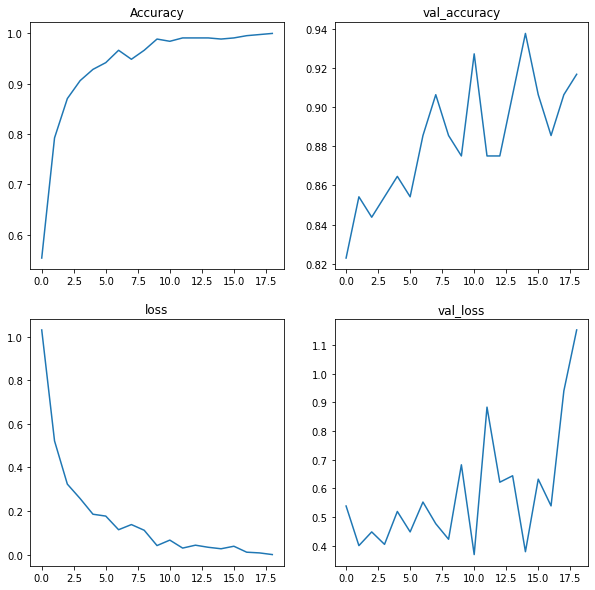

avg accuracy: 0.936560144549922
avg val accuracy: 0.8832236904846994

**********************************************************************
EPOCH SIZE 19 HAS AVG VAL ACCURACY OF 0.8832236904846994
**********************************************************************

EPOCH: 21
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/21
56/56 [==============================] - 32s 473ms/step - loss: 1.0019 - accuracy: 0.5692 - val_loss: 0.5761 - val_accuracy: 0.7917
Epoch 2/21
56/56 [==============================] - 28s 501ms/step - loss: 0.5268 - accuracy: 0.7835 - val_loss: 0.4231 - val_accuracy: 0.8750
Epoch 3/21
56/56 [==============================] - 28s 495ms/step - loss: 0.3482 - accuracy: 0.8527 - val_loss: 0.3587 - val_accuracy: 0.8646
Epoch 4/21
56/56 [==============================] - 28s 507ms/step - loss: 0.2738 - accuracy: 0.8772 - val_loss: 0.3495 - val_accuracy: 0.8958
Epoch 5/21
56/56 [==============================] - 22s 391ms/step

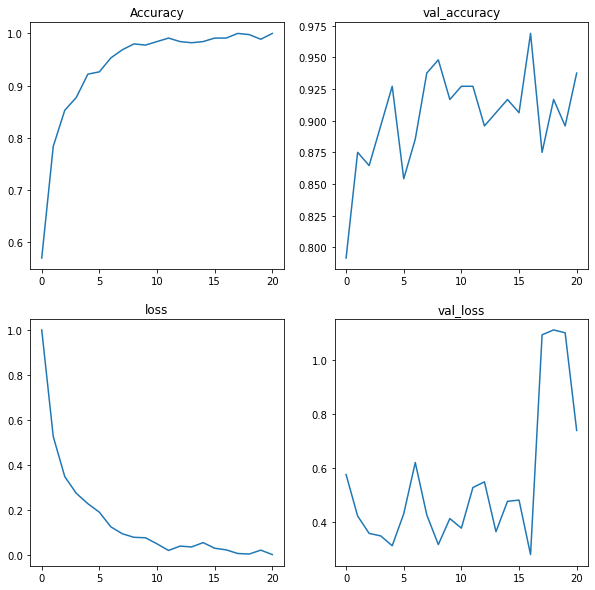

avg accuracy: 0.9383503368922642
avg val accuracy: 0.9032738095238095

**********************************************************************
EPOCH SIZE 21 HAS AVG VAL ACCURACY OF 0.9032738095238095
**********************************************************************

EPOCH: 23
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/23
56/56 [==============================] - 18s 309ms/step - loss: 0.9496 - accuracy: 0.5580 - val_loss: 0.6200 - val_accuracy: 0.8021
Epoch 2/23
56/56 [==============================] - 16s 293ms/step - loss: 0.5609 - accuracy: 0.7879 - val_loss: 0.4145 - val_accuracy: 0.8854
Epoch 3/23
56/56 [==============================] - 17s 313ms/step - loss: 0.3345 - accuracy: 0.8817 - val_loss: 0.4258 - val_accuracy: 0.8229
Epoch 4/23
56/56 [==============================] - 17s 295ms/step - loss: 0.2824 - accuracy: 0.8973 - val_loss: 0.2844 - val_accuracy: 0.9271
Epoch 5/23
56/56 [==============================] - 15s 274ms/ste

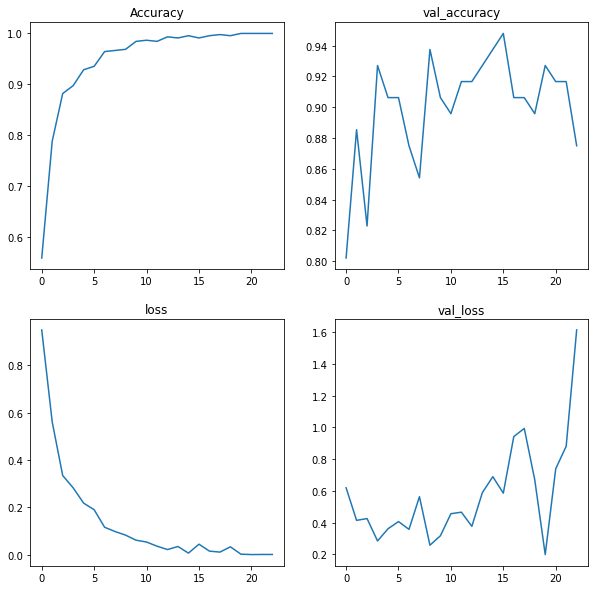

avg accuracy: 0.9479813653489818
avg val accuracy: 0.9003623205682506

**********************************************************************
EPOCH SIZE 23 HAS AVG VAL ACCURACY OF 0.9003623205682506
**********************************************************************

EPOCH: 25
Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/25
56/56 [==============================] - 24s 403ms/step - loss: 1.0024 - accuracy: 0.5692 - val_loss: 0.6476 - val_accuracy: 0.7188
Epoch 2/25
56/56 [==============================] - 23s 402ms/step - loss: 0.5493 - accuracy: 0.7924 - val_loss: 0.4622 - val_accuracy: 0.8229
Epoch 3/25
56/56 [==============================] - 17s 299ms/step - loss: 0.3956 - accuracy: 0.8482 - val_loss: 0.3672 - val_accuracy: 0.8542
Epoch 4/25
56/56 [==============================] - 19s 343ms/step - loss: 0.2664 - accuracy: 0.9152 - val_loss: 0.4352 - val_accuracy: 0.8750
Epoch 5/25
56/56 [==============================] - 18s 326ms/ste

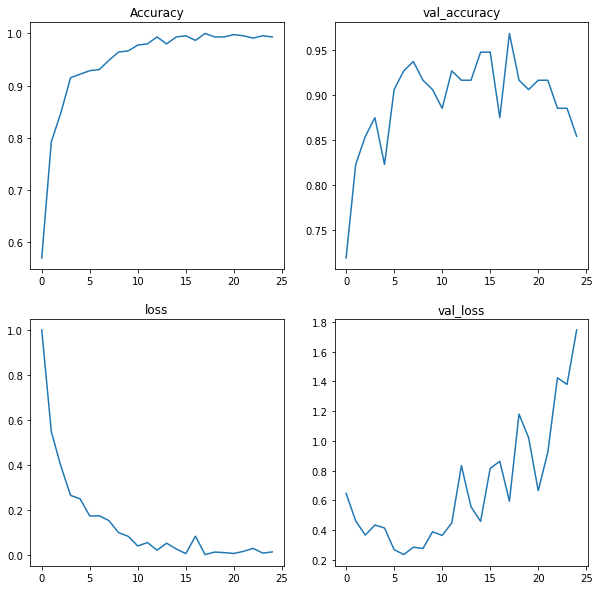

avg accuracy: 0.9460714387893677
avg val accuracy: 0.8941666769981385

**********************************************************************
EPOCH SIZE 25 HAS AVG VAL ACCURACY OF 0.8941666769981385
**********************************************************************



In [26]:
# -----------------------------------------------------------------------

epochs = [3, 4, 5, 6, 8, 10, 11, 13, 15, 17, 19, 21, 23, 25]

for epoch in epochs:
    print('EPOCH:', epoch)
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
    model.add(Dropout(0.5))

    # Last layer, not binary!
    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss='categorical_crossentropy', #not binary for the poses
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    batch_size = 8

    train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                                   target_size=image_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical') #catagoricalnfor the poses
    test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                                   target_size=image_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

    t = time.time()
    results = model.fit(train_image_gen,epochs=epoch,
                                  #steps_per_epoch=50,
                                  validation_data=test_image_gen,
                                 validation_steps=12)
    print('Duration:', time.time() - t)

    print(results.history)

    figure, axis = plt.subplots(2, 2, figsize=(10,10))

    # For Sine Function
    axis[0, 0].plot(results.history['accuracy'])
    axis[0, 0].set_title("Accuracy")

    # For Cosine Function
    axis[0, 1].plot(results.history['val_accuracy'])
    axis[0, 1].set_title("val_accuracy")

    # For Tangent Function
    axis[1, 0].plot(results.history['loss'])
    axis[1, 0].set_title("loss")

    # For Tanh Function
    axis[1, 1].plot(results.history['val_loss'])
    axis[1, 1].set_title("val_loss")

    # Combine all the operations and display
    plt.show()

    print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
    print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))
    print('\n**********************************************************************')
    print('EPOCH SIZE', epoch, 'HAS AVG VAL ACCURACY OF', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))
    print('**********************************************************************\n')

## Experiment with Learning Rate 0.00001 & adam optimizer

Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/21
56/56 [==============================] - 15s 258ms/step - loss: 1.0971 - accuracy: 0.3661 - val_loss: 1.0401 - val_accuracy: 0.5729
Epoch 2/21
56/56 [==============================] - 14s 255ms/step - loss: 1.0131 - accuracy: 0.5469 - val_loss: 0.9758 - val_accuracy: 0.6250
Epoch 3/21
56/56 [==============================] - 14s 254ms/step - loss: 0.9652 - accuracy: 0.5759 - val_loss: 0.9061 - val_accuracy: 0.6979
Epoch 4/21
56/56 [==============================] - 14s 255ms/step - loss: 0.9110 - accuracy: 0.6116 - val_loss: 0.8672 - val_accuracy: 0.7083
Epoch 5/21
56/56 [==============================] - 14s 254ms/step - loss: 0.8374 - accuracy: 0.6652 - val_loss: 0.7852 - val_accuracy: 0.7188
Epoch 6/21
56/56 [==============================] - 14s 255ms/step - loss: 0.7740 - accuracy: 0.6942 - val_loss: 0.7678 - val_accuracy: 0.6771
Epoch 7/21
56/56 [==============================] - 14s 255m

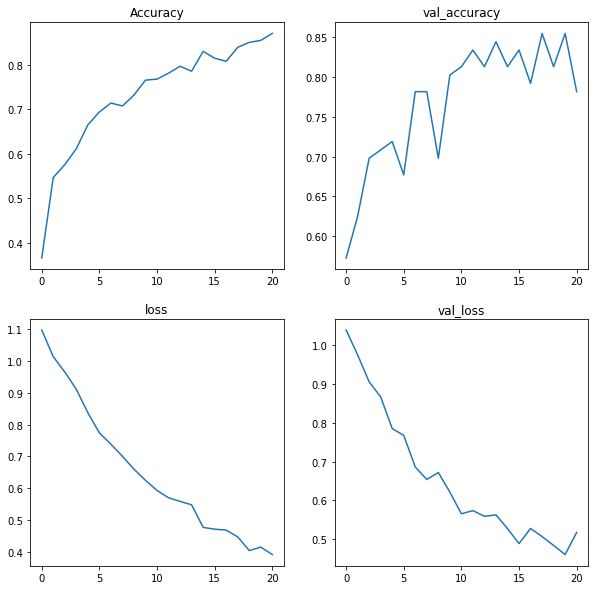

In [29]:
batch_size = 8
epoch = 21

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer=opt,
              metrics=['accuracy'])


train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=epoch,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")

# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()

In [30]:
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

avg accuracy: 0.7323554427850814
avg val accuracy: 0.7668650803111848


## same as above, with 15 epoch

Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/15
56/56 [==============================] - 16s 274ms/step - loss: 1.0769 - accuracy: 0.4219 - val_loss: 1.0464 - val_accuracy: 0.5833
Epoch 2/15
56/56 [==============================] - 14s 255ms/step - loss: 1.0167 - accuracy: 0.5469 - val_loss: 0.9799 - val_accuracy: 0.6250
Epoch 3/15
56/56 [==============================] - 14s 254ms/step - loss: 0.9518 - accuracy: 0.6228 - val_loss: 0.9062 - val_accuracy: 0.6458
Epoch 4/15
56/56 [==============================] - 14s 256ms/step - loss: 0.8824 - accuracy: 0.6339 - val_loss: 0.8355 - val_accuracy: 0.6875
Epoch 5/15
56/56 [==============================] - 14s 254ms/step - loss: 0.8147 - accuracy: 0.6964 - val_loss: 0.7845 - val_accuracy: 0.6771
Epoch 6/15
56/56 [==============================] - 14s 254ms/step - loss: 0.7545 - accuracy: 0.7321 - val_loss: 0.7595 - val_accuracy: 0.7188
Epoch 7/15
56/56 [==============================] - 14s 255m

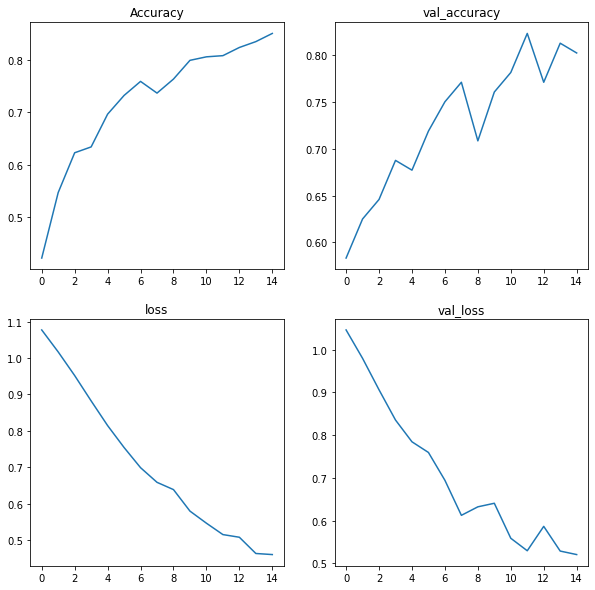

avg accuracy: 0.7223214348157246
avg val accuracy: 0.7277777711550395


In [31]:
batch_size = 8
epoch = 15

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer=opt,
              metrics=['accuracy'])


train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=epoch,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")

# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

## same as above, but with softmax activation

Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/15
56/56 [==============================] - 16s 275ms/step - loss: 1.0795 - accuracy: 0.4040 - val_loss: 1.0241 - val_accuracy: 0.5729
Epoch 2/15
56/56 [==============================] - 15s 270ms/step - loss: 1.0059 - accuracy: 0.5290 - val_loss: 0.9363 - val_accuracy: 0.6875
Epoch 3/15
56/56 [==============================] - 15s 270ms/step - loss: 0.9374 - accuracy: 0.5670 - val_loss: 0.8843 - val_accuracy: 0.6771
Epoch 4/15
56/56 [==============================] - 15s 270ms/step - loss: 0.8456 - accuracy: 0.6853 - val_loss: 0.8105 - val_accuracy: 0.7083
Epoch 5/15
56/56 [==============================] - 15s 273ms/step - loss: 0.8074 - accuracy: 0.6429 - val_loss: 0.7712 - val_accuracy: 0.6979
Epoch 6/15
56/56 [==============================] - 15s 273ms/step - loss: 0.7553 - accuracy: 0.6763 - val_loss: 0.7322 - val_accuracy: 0.7500
Epoch 7/15
56/56 [==============================] - 15s 272m

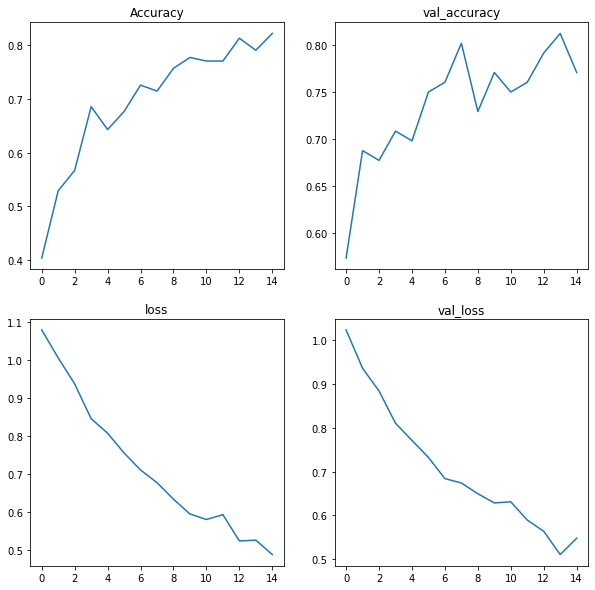

avg accuracy: 0.6961309512456259
avg val accuracy: 0.7361111124356587


In [32]:
batch_size = 8
epoch = 15

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer=opt,
              metrics=['accuracy'])


train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=epoch,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")

# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

# change optimizer back to RMSprop with LR 0.00001

Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/15
56/56 [==============================] - 16s 269ms/step - loss: 1.0635 - accuracy: 0.4286 - val_loss: 0.9807 - val_accuracy: 0.5938
Epoch 2/15
56/56 [==============================] - 15s 265ms/step - loss: 0.9779 - accuracy: 0.5580 - val_loss: 0.9412 - val_accuracy: 0.5625
Epoch 3/15
56/56 [==============================] - 15s 264ms/step - loss: 0.9138 - accuracy: 0.6071 - val_loss: 0.8605 - val_accuracy: 0.6354
Epoch 4/15
56/56 [==============================] - 15s 265ms/step - loss: 0.8630 - accuracy: 0.6049 - val_loss: 0.8354 - val_accuracy: 0.6771
Epoch 5/15
56/56 [==============================] - 15s 268ms/step - loss: 0.8097 - accuracy: 0.6652 - val_loss: 0.7864 - val_accuracy: 0.7292
Epoch 6/15
56/56 [==============================] - 15s 266ms/step - loss: 0.7579 - accuracy: 0.7143 - val_loss: 0.7815 - val_accuracy: 0.6875
Epoch 7/15
56/56 [==============================] - 15s 268m

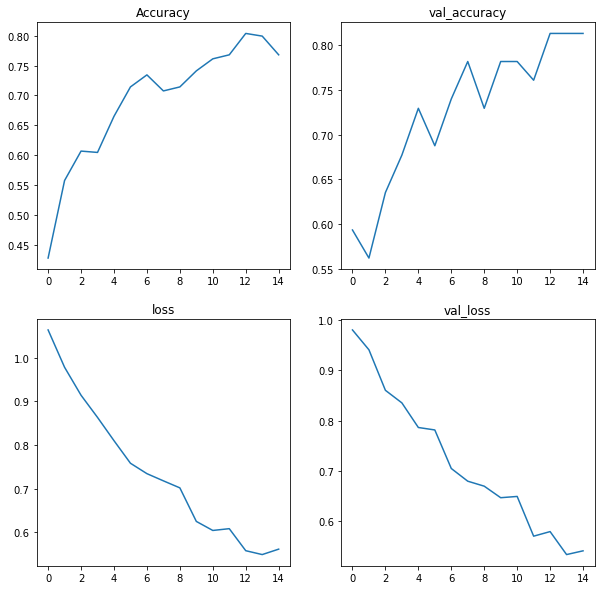

avg accuracy: 0.6916666686534881
avg val accuracy: 0.7263888915379842


In [33]:
batch_size = 8
epoch = 15

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer=opt,
              metrics=['accuracy'])


train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=epoch,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")

# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

# Increase learning rate to 0.0001

Found 448 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
Epoch 1/15
56/56 [==============================] - 16s 276ms/step - loss: 0.9554 - accuracy: 0.5491 - val_loss: 0.7384 - val_accuracy: 0.6562
Epoch 2/15
56/56 [==============================] - 15s 265ms/step - loss: 0.7172 - accuracy: 0.6741 - val_loss: 0.6261 - val_accuracy: 0.7604
Epoch 3/15
56/56 [==============================] - 15s 266ms/step - loss: 0.5816 - accuracy: 0.7723 - val_loss: 0.5631 - val_accuracy: 0.8021
Epoch 4/15
56/56 [==============================] - 15s 266ms/step - loss: 0.4362 - accuracy: 0.8326 - val_loss: 0.6911 - val_accuracy: 0.7188
Epoch 5/15
56/56 [==============================] - 15s 268ms/step - loss: 0.4009 - accuracy: 0.8438 - val_loss: 0.4189 - val_accuracy: 0.8646
Epoch 6/15
56/56 [==============================] - 15s 276ms/step - loss: 0.3770 - accuracy: 0.8594 - val_loss: 0.3729 - val_accuracy: 0.8333
Epoch 7/15
56/56 [==============================] - 16s 279m

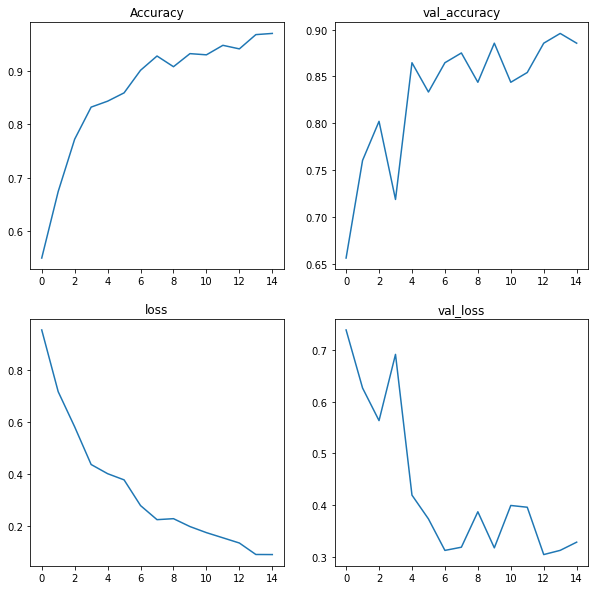

avg accuracy: 0.8642857114473979
avg val accuracy: 0.83125


In [34]:
# incrs lr
batch_size = 8
epoch = 15

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, not binary!
model.add(Dense(3))
model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', #not binary for the poses
              optimizer=opt,
              metrics=['accuracy'])


train_image_gen = image_gen.flow_from_directory('actionsBalanced/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') #catagoricalnfor the poses
test_image_gen = image_gen.flow_from_directory('actionsBalanced/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

t = time.time()
results = model.fit(train_image_gen,epochs=epoch,
                              #steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)
print('Duration:', time.time() - t)

print(results.history)

figure, axis = plt.subplots(2, 2, figsize=(10,10))

# For Sine Function
axis[0, 0].plot(results.history['accuracy'])
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].plot(results.history['val_accuracy'])
axis[0, 1].set_title("val_accuracy")

# For Tangent Function
axis[1, 0].plot(results.history['loss'])
axis[1, 0].set_title("loss")

# For Tanh Function
axis[1, 1].plot(results.history['val_loss'])
axis[1, 1].set_title("val_loss")

# Combine all the operations and display
plt.show()
print('avg accuracy:', (sum(results.history['accuracy'])/len(results.history['accuracy'])))
print('avg val accuracy:', (sum(results.history['val_accuracy'])/len(results.history['val_accuracy'])))

# Predicting on new images

In [55]:
train_image_gen.class_indices

{'fall': 0, 'onFeet': 1, 'sit': 2}

In [56]:
import numpy as np
from keras.preprocessing import image

pose_file = 'testing/walk5.jpg'

pose = image.load_img(pose_file, target_size=(150, 150))

pose = image.img_to_array(pose)

pose = np.expand_dims(pose, axis=0) #so the network can think its a batch of one image
pose = pose/255

In [37]:
prediction_prob = new_model.predict(pose)
new_model.predict_classes(pose) 
                               

array([1])

In [34]:
# Output prediction
print(prediction_prob) #how sure is it that the image belongs to the array it chose 

[[1.7743273e-06 3.3431544e-07 1.8688984e-07 3.5053063e-02]]


In [57]:
import numpy as np
from keras.preprocessing import image
#function to classify a pose
def predictPose(imageName):
    #resize the image since the model is trained with 150 by 150 images
    pose = image.load_img(imageName, target_size=(150,150))
    pose = image.img_to_array(pose)
    pose = np.expand_dims(pose, axis=0)
    pose = pose/255
    
    #actual classification
    prediction_prob = new_model.predict(pose)
    #returns which pose
    poseNumber = new_model.predict_classes(pose)
    #print(prediction_prob)
    return poseNumber[0]+1
    
    

In [58]:
import time
import numpy as np
from PIL import Image
import os
import sys

In [59]:
# gets all the images and classifies them using the model trained
def getAllImages(rootdir):
    """Gets all of the images in a folder and runs them through OpenPose.
    You just need to run this function with the folder of pose images"""
    path, dirs, files = next(os.walk(rootdir))
    file_count = len(files) - 1
    poseList = []
    action = 0
    actionList = []
    i = 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            # print os.path.join(subdir, file)
            filepath = subdir + os.sep + file

            if filepath.endswith(".jpg"):
                i += 1
                #printProgressBar(i + 1, file_count, prefix='Progress:', suffix='Complete', length=50)
                print("processing image "+ str(filepath))
                action = predictPose(filepath)
                print(action)
                actionList.append(action)
    return actionList
                

In [60]:
def calcPercentage(catagory,result):
    fall = 0
    onFeet = 0
    sit = 0
    size = len(result)
    for i in result:
        if i == 1:
            fall += 1
        elif i == 2:
            onFeet += 1
        elif i == 3:
            sit += 1
        else:
            print("error")
    print('Result of', size, catagory, 'images')
    print('fall:', fall, str((fall/size)*100)+'%')
    print('sit:', sit, str((sit/size)*100)+'%')
    print('onFeet:', onFeet, str((onFeet/size)*100)+'%')

In [61]:
#testing falling
t = time.time()
print("Time at start: " + str((time.time() - t)))
fallingResult = getAllImages('testing/fall')
print("Time taken: " + str((time.time() - t)))

Time at start: 6.29425048828125e-05
processing image testing/fall/f210.jpg
1
processing image testing/fall/f225.jpg
1
processing image testing/fall/f248.jpg
1
processing image testing/fall/f221.jpg
1
processing image testing/fall/f228.jpg
1
processing image testing/fall/f197.jpg
1
processing image testing/fall/f252.jpg
3
processing image testing/fall/f203.jpg
1
processing image testing/fall/f259.jpg
1
processing image testing/fall/f208.jpg
1
processing image testing/fall/f229.jpg
1
processing image testing/fall/f223.jpg
1
processing image testing/fall/f238.jpg
1
processing image testing/fall/f202.jpg
1
processing image testing/fall/f256.jpg
1
processing image testing/fall/f194.jpg
1
processing image testing/fall/f199.jpg
3
processing image testing/fall/f236.jpg
2
processing image testing/fall/f206.jpg
3
processing image testing/fall/f230.jpg
1
processing image testing/fall/f244.jpg
2
processing image testing/fall/f205.jpg
2
processing image testing/fall/f237.jpg
1
processing image test

In [62]:
#displaying results of falling
calcPercentage('falling', fallingResult)

Result of 72 falling images
fall: 59 81.94444444444444%
sit: 6 8.333333333333332%
onFeet: 7 9.722222222222223%


In [63]:
#testing onFeet
t = time.time()
print("Time at start: " + str((time.time() - t)))
onFeetResult = getAllImages('testing/onFeet')
print("Time taken: " + str((time.time() - t)))

Time at start: 3.910064697265625e-05
processing image testing/onFeet/o465.jpg
2
processing image testing/onFeet/o423.jpg
1
processing image testing/onFeet/o472.jpg
2
processing image testing/onFeet/o434.jpg
2
processing image testing/onFeet/o403.jpg
2
processing image testing/onFeet/o444.jpg
2
processing image testing/onFeet/o418.jpg
2
processing image testing/onFeet/o473.jpg
2
processing image testing/onFeet/o415.jpg
1
processing image testing/onFeet/o454.jpg
2
processing image testing/onFeet/o431.jpg
2
processing image testing/onFeet/o437.jpg
2
processing image testing/onFeet/o392.jpg
2
processing image testing/onFeet/o408.jpg
2
processing image testing/onFeet/o435.jpg
2
processing image testing/onFeet/o443.jpg
2
processing image testing/onFeet/o391.jpg
2
processing image testing/onFeet/o390.jpg
2
processing image testing/onFeet/o410.jpg
2
processing image testing/onFeet/o442.jpg
2
processing image testing/onFeet/o461.jpg
2
processing image testing/onFeet/o458.jpg
2
processing image 

In [64]:
#displaying results of onFeet
calcPercentage('onFeet', onFeetResult)

Result of 83 onFeet images
fall: 5 6.024096385542169%
sit: 1 1.2048192771084338%
onFeet: 77 92.7710843373494%


In [65]:
#testing sitting
t = time.time()
print("Time at start: " + str((time.time() - t)))
sitResult = getAllImages('testing/sit')
print("Time taken: " + str((time.time() - t)))

Time at start: 3.790855407714844e-05
processing image testing/sit/s136.jpg
3
processing image testing/sit/s134.jpg
3
processing image testing/sit/s147.jpg
3
processing image testing/sit/s141.jpg
3
processing image testing/sit/s135.jpg
3
processing image testing/sit/s146.jpg
3
processing image testing/sit/s140.jpg
3
processing image testing/sit/s138.jpg
3
processing image testing/sit/s142.jpg
3
processing image testing/sit/s139.jpg
3
processing image testing/sit/s145.jpg
3
processing image testing/sit/s144.jpg
3
processing image testing/sit/s143.jpg
3
Time taken: 0.8497967720031738


In [66]:
#displaying results of sitting
calcPercentage('sitting', sitResult)

Result of 13 sitting images
fall: 0 0.0%
sit: 13 100.0%
onFeet: 0 0.0%


In [26]:
#testing falling (binary)
t = time.time()
print("Time at start: " + str((time.time() - t)))
fallingResult = getAllImages('testing/fall')
print("Time taken: " + str((time.time() - t)))

Time at start: 5.1021575927734375e-05
processing image testing/fall/77.jpg
2
processing image testing/fall/89.jpg
1
processing image testing/fall/62.jpg
1
processing image testing/fall/60.jpg
2
processing image testing/fall/48.jpg
2
processing image testing/fall/49.jpg
2
processing image testing/fall/59.jpg
1
processing image testing/fall/71.jpg
1
processing image testing/fall/64.jpg
1
processing image testing/fall/8.jpg
1
processing image testing/fall/66.jpg
1
processing image testing/fall/99.jpg
1
processing image testing/fall/98.jpg
2
processing image testing/fall/73.jpg
1
processing image testing/fall/67.jpg
1
processing image testing/fall/9.jpg
1
processing image testing/fall/14.jpg
1
processing image testing/fall/28.jpg
1
processing image testing/fall/101.jpg
1
processing image testing/fall/115.jpg
1
processing image testing/fall/17.jpg
1
processing image testing/fall/116.jpg
1
processing image testing/fall/103.jpg
1
processing image testing/fall/117.jpg
1
processing image testin

In [32]:
#displaying results of falling
calcPercentage('falling', fallingResult)

Result of 83 falling images
fall: 72 86.74698795180723%
onFeet: 11 13.253012048192772%


In [28]:
#testing falling (binary)
t = time.time()
print("Time at start: " + str((time.time() - t)))
onFeetResult = getAllImages('testing/onFeet')
print("Time taken: " + str((time.time() - t)))

Time at start: 5.1021575927734375e-05
processing image testing/onFeet/63.jpg
2
processing image testing/onFeet/77.jpg
1
processing image testing/onFeet/162.jpg
2
processing image testing/onFeet/62.jpg
2
processing image testing/onFeet/60.jpg
2
processing image testing/onFeet/149.jpg
2
processing image testing/onFeet/161.jpg
2
processing image testing/onFeet/160.jpg
2
processing image testing/onFeet/148.jpg
2
processing image testing/onFeet/49.jpg
2
processing image testing/onFeet/61.jpg
2
processing image testing/onFeet/59.jpg
2
processing image testing/onFeet/71.jpg
2
processing image testing/onFeet/65.jpg
2
processing image testing/onFeet/158.jpg
2
processing image testing/onFeet/159.jpg
2
processing image testing/onFeet/64.jpg
1
processing image testing/onFeet/70.jpg
2
processing image testing/onFeet/58.jpg
2
processing image testing/onFeet/8.jpg
1
processing image testing/onFeet/66.jpg
2
processing image testing/onFeet/72.jpg
2
processing image testing/onFeet/73.jpg
1
processing im

In [31]:
#displaying results of falling
calcPercentage('onFeet', onFeetResult)

Result of 87 onFeet images
fall: 7 8.045977011494253%
onFeet: 80 91.95402298850574%


In [4]:
def renameImages(rootdir, char, location):
    for root, dirs, files in os.walk(rootdir):
        j = location
        for i,f in enumerate(files):
            absname = os.path.join(root, f)
            newname = os.path.join(root + '/' + char + str(j) + '.jpg')
            j+=1
            print ("renaming " + absname + " to " + newname)
            os.rename(absname, newname)
               
                

In [99]:
renameImages('actionskfold/train/fall', 'f', 0)

renaming actionskfold/train/fall/63.jpg to actionskfold/train/fall/f0.jpg
renaming actionskfold/train/fall/77.jpg to actionskfold/train/fall/f1.jpg
renaming actionskfold/train/fall/201.jpg to actionskfold/train/fall/f2.jpg
renaming actionskfold/train/fall/215.jpg to actionskfold/train/fall/f3.jpg
renaming actionskfold/train/fall/229.jpg to actionskfold/train/fall/f4.jpg
renaming actionskfold/train/fall/89.jpg to actionskfold/train/fall/f5.jpg
renaming actionskfold/train/fall/163.jpg to actionskfold/train/fall/f6.jpg
renaming actionskfold/train/fall/60.jpg to actionskfold/train/fall/f7.jpg
renaming actionskfold/train/fall/48.jpg to actionskfold/train/fall/f8.jpg
renaming actionskfold/train/fall/175.jpg to actionskfold/train/fall/f9.jpg
renaming actionskfold/train/fall/217.jpg to actionskfold/train/fall/f10.jpg
renaming actionskfold/train/fall/202.jpg to actionskfold/train/fall/f11.jpg
renaming actionskfold/train/fall/174.jpg to actionskfold/train/fall/f12.jpg
renaming actionskfold/train

In [100]:
renameImages('actionskfold/train/onFeet', 'o', 0)

renaming actionskfold/train/onFeet/63.jpg to actionskfold/train/onFeet/o0.jpg
renaming actionskfold/train/onFeet/189.jpg to actionskfold/train/onFeet/o1.jpg
renaming actionskfold/train/onFeet/77.jpg to actionskfold/train/onFeet/o2.jpg
renaming actionskfold/train/onFeet/176.jpg to actionskfold/train/onFeet/o3.jpg
renaming actionskfold/train/onFeet/88.jpg to actionskfold/train/onFeet/o4.jpg
renaming actionskfold/train/onFeet/348.jpg to actionskfold/train/onFeet/o5.jpg
renaming actionskfold/train/onFeet/406.jpg to actionskfold/train/onFeet/o6.jpg
renaming actionskfold/train/onFeet/412.jpg to actionskfold/train/onFeet/o7.jpg
renaming actionskfold/train/onFeet/228.jpg to actionskfold/train/onFeet/o8.jpg
renaming actionskfold/train/onFeet/214.jpg to actionskfold/train/onFeet/o9.jpg
renaming actionskfold/train/onFeet/200.jpg to actionskfold/train/onFeet/o10.jpg
renaming actionskfold/train/onFeet/201.jpg to actionskfold/train/onFeet/o11.jpg
renaming actionskfold/train/onFeet/229.jpg to actions

renaming actionskfold/train/onFeet/146.jpg to actionskfold/train/onFeet/o290.jpg
renaming actionskfold/train/onFeet/152.jpg to actionskfold/train/onFeet/o291.jpg
renaming actionskfold/train/onFeet/84.jpg to actionskfold/train/onFeet/o292.jpg
renaming actionskfold/train/onFeet/90.jpg to actionskfold/train/onFeet/o293.jpg
renaming actionskfold/train/onFeet/387.jpg to actionskfold/train/onFeet/o294.jpg
renaming actionskfold/train/onFeet/393.jpg to actionskfold/train/onFeet/o295.jpg
renaming actionskfold/train/onFeet/344.jpg to actionskfold/train/onFeet/o296.jpg
renaming actionskfold/train/onFeet/350.jpg to actionskfold/train/onFeet/o297.jpg
renaming actionskfold/train/onFeet/378.jpg to actionskfold/train/onFeet/o298.jpg
renaming actionskfold/train/onFeet/218.jpg to actionskfold/train/onFeet/o299.jpg
renaming actionskfold/train/onFeet/225.jpg to actionskfold/train/onFeet/o300.jpg
renaming actionskfold/train/onFeet/231.jpg to actionskfold/train/onFeet/o301.jpg
renaming actionskfold/train/on

In [101]:
renameImages('actionskfold/train/sit', 's', 0)

renaming actionskfold/train/sit/63.jpg to actionskfold/train/sit/s0.jpg
renaming actionskfold/train/sit/162.jpg to actionskfold/train/sit/s1.jpg
renaming actionskfold/train/sit/88.jpg to actionskfold/train/sit/s2.jpg
renaming actionskfold/train/sit/89.jpg to actionskfold/train/sit/s3.jpg
renaming actionskfold/train/sit/48.jpg to actionskfold/train/sit/s4.jpg
renaming actionskfold/train/sit/149.jpg to actionskfold/train/sit/s5.jpg
renaming actionskfold/train/sit/160.jpg to actionskfold/train/sit/s6.jpg
renaming actionskfold/train/sit/148.jpg to actionskfold/train/sit/s7.jpg
renaming actionskfold/train/sit/49.jpg to actionskfold/train/sit/s8.jpg
renaming actionskfold/train/sit/61.jpg to actionskfold/train/sit/s9.jpg
renaming actionskfold/train/sit/75.jpg to actionskfold/train/sit/s10.jpg
renaming actionskfold/train/sit/59.jpg to actionskfold/train/sit/s11.jpg
renaming actionskfold/train/sit/71.jpg to actionskfold/train/sit/s12.jpg
renaming actionskfold/train/sit/65.jpg to actionskfold/tr

In [103]:
renameImages('actionskfold/test/fall', 'f', 148)

renaming actionskfold/test/fall/348.jpg to actionskfold/test/fall/f148.jpg
renaming actionskfold/test/fall/349.jpg to actionskfold/test/fall/f149.jpg
renaming actionskfold/test/fall/.DS_Store to actionskfold/test/fall/f150.jpg
renaming actionskfold/test/fall/303.jpg to actionskfold/test/fall/f151.jpg
renaming actionskfold/test/fall/317.jpg to actionskfold/test/fall/f152.jpg
renaming actionskfold/test/fall/288.jpg to actionskfold/test/fall/f153.jpg
renaming actionskfold/test/fall/316.jpg to actionskfold/test/fall/f154.jpg
renaming actionskfold/test/fall/302.jpg to actionskfold/test/fall/f155.jpg
renaming actionskfold/test/fall/328.jpg to actionskfold/test/fall/f156.jpg
renaming actionskfold/test/fall/314.jpg to actionskfold/test/fall/f157.jpg
renaming actionskfold/test/fall/301.jpg to actionskfold/test/fall/f158.jpg
renaming actionskfold/test/fall/315.jpg to actionskfold/test/fall/f159.jpg
renaming actionskfold/test/fall/329.jpg to actionskfold/test/fall/f160.jpg
renaming actionskfold/t

In [105]:
renameImages('actionskfold/test/onFeet', 'o', 311)

renaming actionskfold/test/onFeet/406.jpg to actionskfold/test/onFeet/o311.jpg
renaming actionskfold/test/onFeet/412.jpg to actionskfold/test/onFeet/o312.jpg
renaming actionskfold/test/onFeet/413.jpg to actionskfold/test/onFeet/o313.jpg
renaming actionskfold/test/onFeet/375.jpg to actionskfold/test/onFeet/o314.jpg
renaming actionskfold/test/onFeet/388.jpg to actionskfold/test/onFeet/o315.jpg
renaming actionskfold/test/onFeet/439.jpg to actionskfold/test/onFeet/o316.jpg
renaming actionskfold/test/onFeet/411.jpg to actionskfold/test/onFeet/o317.jpg
renaming actionskfold/test/onFeet/405.jpg to actionskfold/test/onFeet/o318.jpg
renaming actionskfold/test/onFeet/438.jpg to actionskfold/test/onFeet/o319.jpg
renaming actionskfold/test/onFeet/389.jpg to actionskfold/test/onFeet/o320.jpg
renaming actionskfold/test/onFeet/399.jpg to actionskfold/test/onFeet/o321.jpg
renaming actionskfold/test/onFeet/414.jpg to actionskfold/test/onFeet/o322.jpg
renaming actionskfold/test/onFeet/372.jpg to actions

In [107]:
renameImages('actionskfold/test/sit', 's', 102)

renaming actionskfold/test/sit/189.jpg to actionskfold/test/sit/s102.jpg
renaming actionskfold/test/sit/176.jpg to actionskfold/test/sit/s103.jpg
renaming actionskfold/test/sit/201.jpg to actionskfold/test/sit/s104.jpg
renaming actionskfold/test/sit/177.jpg to actionskfold/test/sit/s105.jpg
renaming actionskfold/test/sit/188.jpg to actionskfold/test/sit/s106.jpg
renaming actionskfold/test/sit/175.jpg to actionskfold/test/sit/s107.jpg
renaming actionskfold/test/sit/203.jpg to actionskfold/test/sit/s108.jpg
renaming actionskfold/test/sit/202.jpg to actionskfold/test/sit/s109.jpg
renaming actionskfold/test/sit/174.jpg to actionskfold/test/sit/s110.jpg
renaming actionskfold/test/sit/170.jpg to actionskfold/test/sit/s111.jpg
renaming actionskfold/test/sit/206.jpg to actionskfold/test/sit/s112.jpg
renaming actionskfold/test/sit/.DS_Store to actionskfold/test/sit/s113.jpg
renaming actionskfold/test/sit/207.jpg to actionskfold/test/sit/s114.jpg
renaming actionskfold/test/sit/171.jpg to actions

In [5]:
#renameing the images in the testing directory
renameImages('testing/fall', 'f', 189)

renaming testing/fall/36.jpg to testing/fall/f189.jpg
renaming testing/fall/57.jpg to testing/fall/f190.jpg
renaming testing/fall/45.jpg to testing/fall/f191.jpg
renaming testing/fall/120.jpg to testing/fall/f192.jpg
renaming testing/fall/89.jpg to testing/fall/f193.jpg
renaming testing/fall/25.jpg to testing/fall/f194.jpg
renaming testing/fall/106.jpg to testing/fall/f195.jpg
renaming testing/fall/.DS_Store to testing/fall/f196.jpg
renaming testing/fall/56.jpg to testing/fall/f197.jpg
renaming testing/fall/39.jpg to testing/fall/f198.jpg
renaming testing/fall/80.jpg to testing/fall/f199.jpg
renaming testing/fall/119.jpg to testing/fall/f200.jpg
renaming testing/fall/16.jpg to testing/fall/f201.jpg
renaming testing/fall/7.jpg to testing/fall/f202.jpg
renaming testing/fall/115.jpg to testing/fall/f203.jpg
renaming testing/fall/9.jpg to testing/fall/f204.jpg
renaming testing/fall/105.jpg to testing/fall/f205.jpg
renaming testing/fall/40.jpg to testing/fall/f206.jpg
renaming testing/fall/

In [6]:
renameImages('testing/onFeet', 'o', 390)

renaming testing/onFeet/36.jpg to testing/onFeet/o390.jpg
renaming testing/onFeet/57.jpg to testing/onFeet/o391.jpg
renaming testing/onFeet/45.jpg to testing/onFeet/o392.jpg
renaming testing/onFeet/145.jpg to testing/onFeet/o393.jpg
renaming testing/onFeet/31.jpg to testing/onFeet/o394.jpg
renaming testing/onFeet/46.jpg to testing/onFeet/o395.jpg
renaming testing/onFeet/.DS_Store to testing/onFeet/o396.jpg
renaming testing/onFeet/159.jpg to testing/onFeet/o397.jpg
renaming testing/onFeet/56.jpg to testing/onFeet/o398.jpg
renaming testing/onFeet/24.jpg to testing/onFeet/o399.jpg
renaming testing/onFeet/39.jpg to testing/onFeet/o400.jpg
renaming testing/onFeet/80.jpg to testing/onFeet/o401.jpg
renaming testing/onFeet/152.jpg to testing/onFeet/o402.jpg
renaming testing/onFeet/9.jpg to testing/onFeet/o403.jpg
renaming testing/onFeet/43.jpg to testing/onFeet/o404.jpg
renaming testing/onFeet/69.jpg to testing/onFeet/o405.jpg
renaming testing/onFeet/40.jpg to testing/onFeet/o406.jpg
renaming 

In [7]:
renameImages('testing/sit', 's', 134)

renaming testing/sit/219.jpg to testing/sit/s134.jpg
renaming testing/sit/229.jpg to testing/sit/s135.jpg
renaming testing/sit/230.jpg to testing/sit/s136.jpg
renaming testing/sit/.DS_Store to testing/sit/s137.jpg
renaming testing/sit/211.jpg to testing/sit/s138.jpg
renaming testing/sit/218.jpg to testing/sit/s139.jpg
renaming testing/sit/227.jpg to testing/sit/s140.jpg
renaming testing/sit/228.jpg to testing/sit/s141.jpg
renaming testing/sit/226.jpg to testing/sit/s142.jpg
renaming testing/sit/221.jpg to testing/sit/s143.jpg
renaming testing/sit/223.jpg to testing/sit/s144.jpg
renaming testing/sit/222.jpg to testing/sit/s145.jpg
renaming testing/sit/213.jpg to testing/sit/s146.jpg
renaming testing/sit/214.jpg to testing/sit/s147.jpg
